# **KÜTÜPHANELERİ IMPORT ETME VE CSV DOSYALARINI OKUMA**


In [1271]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter (action = 'ignore')
pd.set_option('display.max_columns', 200)

In [1272]:
df1 = pd.read_csv('/kaggle/input/datathon/CSAT_Survey_Data.csv')
df2 = pd.read_csv('/kaggle/input/datathon/Customer_Age_Data.csv')
df3 = pd.read_csv('/kaggle/input/datathon/Customer_MRR_Data.csv')
df4 = pd.read_csv('/kaggle/input/datathon/Customer_Revenue_Data.csv')
df5 = pd.read_csv('/kaggle/input/datathon/Help_Ticket_Data.csv')
df6 = pd.read_csv('/kaggle/input/datathon/Newsletter_Interaction_Data.csv')
df7 = pd.read_csv('/kaggle/input/datathon/Product_Bug_Task_Data.csv')
df8 = pd.read_csv('/kaggle/input/datathon/RegionAndVertical_Data.csv')
df9 = pd.read_csv('/kaggle/input/datathon/StatusAndLevel_Data.csv')


# **DATALARI ÖZETLEME FONKSİYONU**

In [1273]:
def summarize_data(df, name):
    print(f"\n{name} DATASET SUMMARY:")
    print(df.shape)
    print("\n", "-"*50, "\n")
    print(df.info())
    print("\n", "-"*50, "\n")
    print(df.describe())
    print("\n", "-"*50, "\n")
    print("Missing Values:")
    print(df.isnull().sum())
    print("\n", "-"*50, "\n")

# **DATALARI SIRAYLA İNCELEME VE DÜZENLEME**

In [1274]:
df1.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
0,CRM-1516050,2022,3,2022-07-01,2022-08-26,10,5,Once a Month,5,5.0,I need someone from Insider team to provide me...
1,CRM-1516050,2022,3,2022-07-01,2022-09-27,10,5,Once a Month,5,5.0,I don't use it often
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...
3,CRM-1470950,2022,3,2022-07-01,2022-09-30,6,3,Once a Week,4,4.0,I tried but could not find everything I need
4,CRM-1470950,2022,2,2022-04-01,2022-06-23,10,5,Once a Day,4,3.0,I need someone from Insider team to provide me...


In [1275]:
summarize_data(df1, "CSAT SURVEY")


CSAT SURVEY DATASET SUMMARY:
(1989, 11)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 11 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Customer ID                                                                1989 non-null   object 
 1   Year                                                                       1989 non-null   int64  
 2   Quarter                                                                    1989 non-null   int64  
 3   Survey Date                                                                1989 non-null   object 
 4   Response Date                                                              1989 non-null   object 
 5   How likely are you to recommend insider to a friend or colleague

## CSAT SURVEY DATASET'İNİN SÜTUN AÇIKLAMASI:  
* "Customer ID" → Müşteri kimliği
  
* "Year" → Anketin yapıldığı yıl.

* "Quarter" → Anketin yapıldığı çeyrek.

* "Survey Date" → Anketin müşteriye gönderildiği tarih.

* "Response Date" → Müşterinin anketi yanıtladığı tarih.

* "How likely are you to recommend insider to a friend or colleague " → Müşterinin Insider'ı bir arkadaşına veya meslektaşına önerme olasılığı (1-10 arasında bir puan).

* "How would you rate the value you gain from our company" → Insider’dan elde edilen değerin müşteri tarafından değerlendirilmesi.

* "How frequently are you using our platform" → Platformun ne sıklıkla kullanıldığı

* "Please rate the overall quality of our products" → Müşterilerin şirketin sunduğu ürünlerin kalitesi hakkında verdiği puan (0-5 arasında)

* "Please rate the usability of the panel" → Müşterilerin, panelin kullanım kolaylığını, arayüzünü ve erişilebilirliğini değerlendirmesi (1-5 arasında)

*  "Please rate your understanding of our reporting capabilities in the panel" → Müşterilerin, panelde sunulan raporlama özelliklerini ne kadar iyi anladıklarını değerlendirmesi

-------------------------------------------------------------------------------------------

* **"Survey Date"** ve **"Response Date"** sütunlarının **object** olan dtypelarını daha işlenebilir dtype olan **datatime**'e çevirdim.

In [1276]:
df1["Survey Date"] = pd.to_datetime(df1["Survey Date"])
df1["Response Date"] = pd.to_datetime(df1["Response Date"])

* **"How frequently are you using our platform"** sütununun kategorik valuelarını, **ordinal encoding** yöntemiyle sayısal valuelara çevirdim.

* Bu sütun, kullanıcıların kullanım sıklığını belirtiyor ve doğal bir sıralama içeriyor.

    **"Once a Month" → 1, 
    "Once a Week" → 2, 
    "Once a Day" → 3**

* Ayrıca missing valuelarını **0** ile doldurdum.

In [1277]:
df1["How frequently are you using our platform"].unique()

array(['Once a Month', 'Once a Day', 'Once a Week', nan], dtype=object)

In [1278]:
df1['How frequently are you using our platform'] = df1['How frequently are you using our platform'].fillna(0)

df1['How frequently are you using our platform'] = df1['How frequently are you using our platform'].replace({'Once a Month': 1, 'Once a Week': 2, 'Once a Day': 3})

In [1279]:
df1["How frequently are you using our platform"].isnull().sum()

0

* **"Please rate your understanding of our reporting capabilities in the panel"** sütunundaki kategorik valueları da, **ordinal encoding** yöntemiyle sayısal valuelara çevirdim.


In [1280]:
df1["Please rate your understanding of our reporting capabilities in the panel"].unique()

array(['I need someone from Insider team to provide me the report from the panel',
       "I don't use it often",
       'I tried but could not find everything I need',
       'I am able to report everything easily',
       "I can pull all the numbers, but don't understand them"],
      dtype=object)

In [1281]:
from sklearn.preprocessing import OrdinalEncoder

categories = [["I need someone from Insider team to provide me the report from the panel",
               "I tried but could not find everything I need",
               "I can pull all the numbers, but don't understand them",
               "I don't use it often",
               "I am able to report everything easily"]]

encoder = OrdinalEncoder(categories = categories)
df1["Please rate your understanding of our reporting capabilities in the panel"] = encoder.fit_transform(df1[["Please rate your understanding of our reporting capabilities in the panel"]])

mapping = dict(zip(categories[0], range(len(categories[0]))))
print("Kategori Eşleştirmesi:\n")
for category, encoded_value in mapping.items():
    print(f"- {category}: {encoded_value}")

Kategori Eşleştirmesi:

- I need someone from Insider team to provide me the report from the panel: 0
- I tried but could not find everything I need: 1
- I can pull all the numbers, but don't understand them: 2
- I don't use it often: 3
- I am able to report everything easily: 4


---------------------------------------------------------------------------------

* **Random Forest Regressor** kullanılarak **"Please rate the usability of the panel"** sütunundaki missing valueları doldurdum.

In [1282]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [1283]:
# missing valueların geçici olarak tanımlanması
df1['Please rate the usability of the panel'] = df1['Please rate the usability of the panel'].fillna(-1)

# model için özellik ve hedef değişkenlerinin belirlenmesi
features = ['How likely are you to recommend insider to a friend or colleague ', 'How would you rate the value you gain from our company', 'How frequently are you using our platform', 'Please rate the overall quality of our products']
target = 'Please rate the usability of the panel'

# train ve test kısımlarının bölünmesi
train_df, test_df = train_test_split(df1, test_size = 0.70, random_state = 35)

# random forest modelinin eğitilmesi 
model = RandomForestRegressor(n_estimators = 100, random_state = 35)
model.fit(train_df[features], train_df[target])

# missing valueların tahmin edilmesi
missing_values_df = df1[df1['Please rate the usability of the panel'] == -1]
predicted_values = model.predict(missing_values_df[features])

df1.loc[df1['Please rate the usability of the panel'] == -1, 'Please rate the usability of the panel'] = predicted_values

# model performansının değerlendirilmesi
test_predictions = model.predict(test_df[features])
mse = mean_squared_error(test_df[target], test_predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.4446981762377553


In [1284]:
df1.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
0,CRM-1516050,2022,3,2022-07-01,2022-08-26,10,5,1,5,5.0,0.0
1,CRM-1516050,2022,3,2022-07-01,2022-09-27,10,5,1,5,5.0,3.0
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,3,2,3.0,0.0
3,CRM-1470950,2022,3,2022-07-01,2022-09-30,6,3,2,4,4.0,1.0
4,CRM-1470950,2022,2,2022-04-01,2022-06-23,10,5,3,4,3.0,0.0


In [1285]:
summarize_data(df1, "CSAT SURVEY")


CSAT SURVEY DATASET SUMMARY:
(1989, 11)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 11 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   Customer ID                                                                1989 non-null   object        
 1   Year                                                                       1989 non-null   int64         
 2   Quarter                                                                    1989 non-null   int64         
 3   Survey Date                                                                1989 non-null   datetime64[ns]
 4   Response Date                                                              1989 non-null   datetime64[ns]
 5   How likely are 

# Anket Sonuçlarının Dağılımını Gösteren Histogram Grafiği

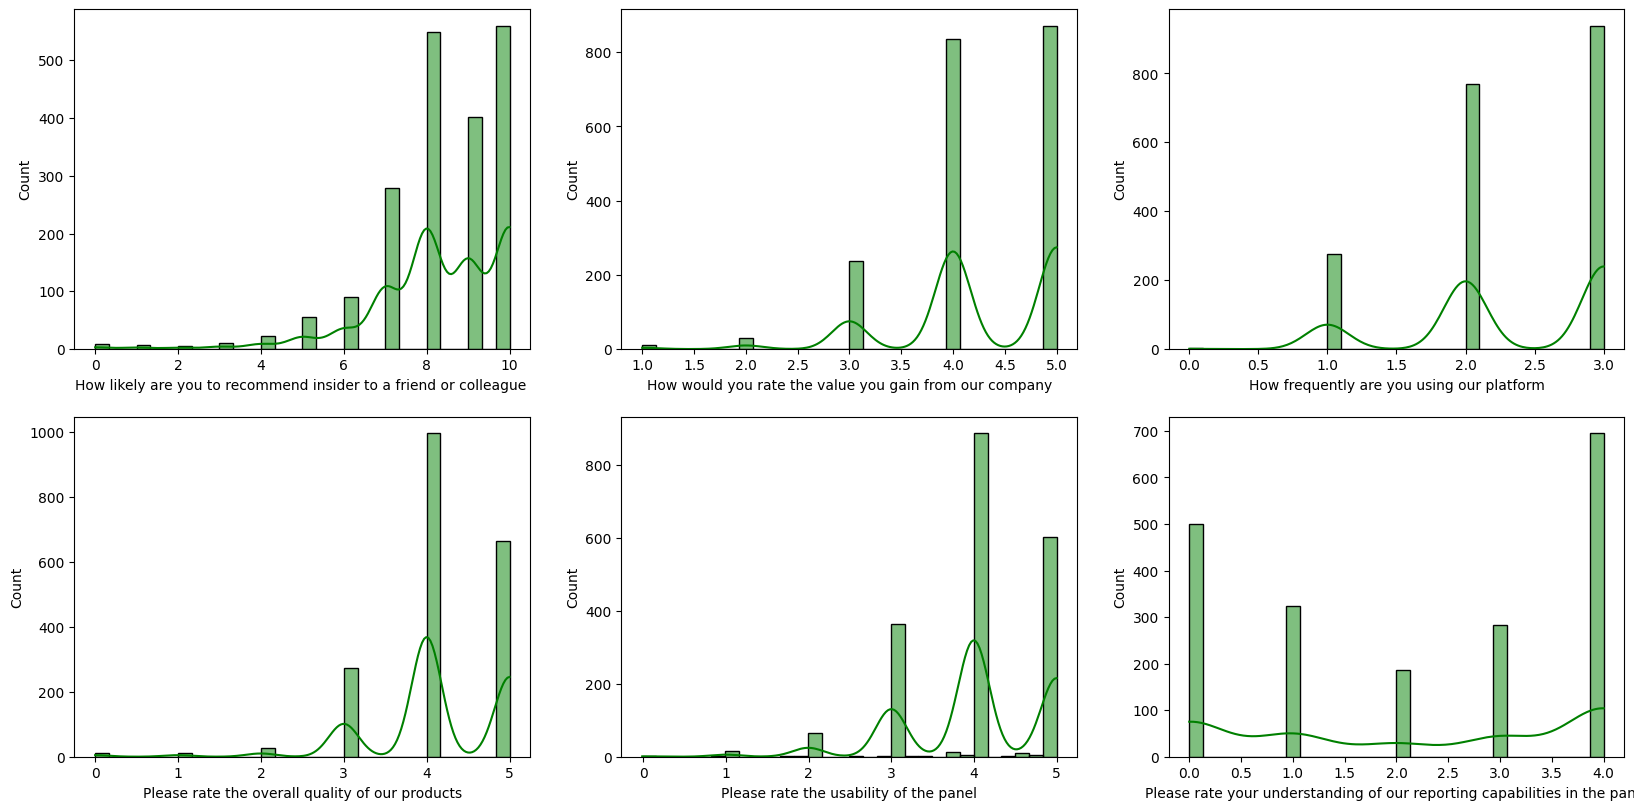

In [1286]:
plt.figure(figsize = (20, 15))
for i, col in enumerate(["How likely are you to recommend insider to a friend or colleague ",
                         "How would you rate the value you gain from our company",
                         "How frequently are you using our platform",
                         "Please rate the overall quality of our products",
                         "Please rate the usability of the panel",
                         "Please rate your understanding of our reporting capabilities in the panel"]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data = df1, x = col, kde = True, bins = 30, color = 'green')
plt.show()

**1."How likely are you to recommend Insider to a friend or colleague?"**
* Bu grafik, kullanıcıların Insider'ı başkalarına önerme olasılıklarını göstermektedir.

* Grafikten, kullanıcıların büyük bir kısmının (10 gibi yüksek bir puanda) Insider'ı önermeye istekli olduğu görülmektedir.

* Bu, Insider'ın genel olarak olumlu bir kullanıcı deneyimi sunduğunu ve kullanıcıların memnuniyet düzeyinin yüksek olduğunu göstermektedir.


**2."How would you rate the value you gain from our company?"** 

* Bu grafik, kullanıcıların şirketten elde ettikleri değeri değerlendirme düzeylerini göstermektedir.
* Grafikten, kullanıcıların büyük bir kısmının (5 gibi yüksek bir puanda) şirketten yüksek değer elde ettiğini düşündüğü görülmektedir.
* Bu, şirketin sunduğu ürün veya hizmetlerin kullanıcılar tarafından değerli bulunduğunu göstermektedir.


**3."How frequently are you using our platform?"**

* Bu grafik, kullanıcıların platformu kullanım sıklıklarını göstermektedir.
* Grafikten, kullanım sıklığı ile ilgili birden fazla tepe noktası olduğu görülüyor, bu da kullanıcıların platformu farklı sıklıklarda kullandığını göstermektedir.
* Kullanıcıların kullanım alışkanlıkları farklılıklar göstermektedir.


**4."Please rate the overall quality of our products?"**

* Bu grafik, kullanıcıların ürünlerin genel kalitesini değerlendirme düzeylerini göstermektedir.
* Grafikten, kullanıcıların büyük bir kısmının (5 gibi yüksek bir puanda) ürünlerin kalitesini yüksek bulduğu görülmektedir.
* Bu, ürünlerin genel olarak yüksek kalitede olduğunu ve kullanıcıların memnuniyetini sağladığını göstermektedir.


**5."Please rate the usability of the panel?"**

* Bu grafik, kullanıcıların panelin kullanılabilirliğini değerlendirme düzeylerini göstermektedir.
* Grafikten, kullanıcıların büyük bir kısmının (5 gibi yüksek bir puanda) panelin kullanılabilirliğini yüksek bulduğu görülmektedir.
* Bu, panelin kullanıcı dostu ve kolay kullanılabilir olduğunu göstermektedir.


**6."Please rate your understanding of our reporting capabilities in the panel?"**

* Bu grafik, kullanıcıların paneldeki raporlama yeteneklerini anlama düzeylerini göstermektedir.
* Grafikten, kullanıcıların raporlama yeteneklerini anlama düzeyi ile ilgili birden fazla tepe noktası olduğu görülüyor, bu da kullanıcıların anlayış seviyesinin farklılıklar gösterdiğini göstermektedir.
* Bu, raporlama yetenekleri konusunda kullanıcılara daha fazla eğitim veya destek sağlanması gerekebileceğini göstermektedir.

---------------------------------------------------------------------------------------

**GENEL DEĞERLENDİRME:**
- Genel olarak, anket sonuçları Insider'ın kullanıcılar tarafından olumlu değerlendirildiğini göstermektedir.
  
- Kullanıcılar, şirketin ürünlerini, hizmetlerini ve panelini genel olarak yüksek kalitede ve kullanışlı bulmaktadır.

- Ancak, raporlama yetenekleri konusunda kullanıcılara daha fazla destek sağlanması gerekebilir.

In [1287]:
df2.head()

,CRM ID,Customer Age (Months)
0,CRM-1471650,24
1,CRM-1516050,13
2,CRM-1087300,25
3,CRM-1467150,12
4,CRM-230550,12


In [1288]:
df2.rename(columns = {'CRM ID': 'Customer ID'}, inplace = True)
df2.head()

,Customer ID,Customer Age (Months)
0,CRM-1471650,24
1,CRM-1516050,13
2,CRM-1087300,25
3,CRM-1467150,12
4,CRM-230550,12


In [1289]:
summarize_data(df2, "CUSTOMER AGE")


CUSTOMER AGE DATASET SUMMARY:
(2651, 2)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Customer ID            2651 non-null   object
 1   Customer Age (Months)  2651 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.5+ KB
None

 -------------------------------------------------- 

       Customer Age (Months)
count            2651.000000
mean               20.077707
std                16.427542
min                 1.000000
25%                 7.000000
50%                15.000000
75%                27.000000
max                72.000000

 -------------------------------------------------- 

Missing Values:
Customer ID              0
Customer Age (Months)    0
dtype: int64

 -------------------------------------------------- 



## CUSTOMER AGE DATASET'İNİN SÜTUN AÇIKLAMASI:  
* "Customer ID" → Müşteri kimliği (Bu sütunun ilk adı CRM ID fakat ilerleyen kısımlar bu sütunu daha etkili kullanabilmek için adını "Customer ID" yaptım.)

* "Customer Age (Months)" → Müşterinin şirkete olan üyelik süresini veya müşteri olma süresini **ay** cinsinden ifade eder.

# Müşterinin Üyelik Süresinin Histogram ve Yoğunluk Eğrisi Grafiği

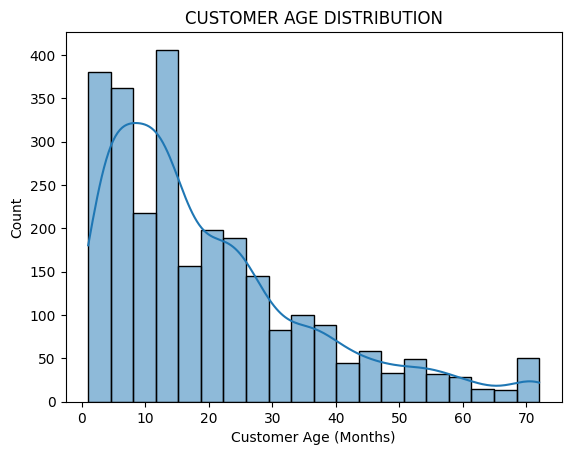

In [1290]:
sns.histplot(df2["Customer Age (Months)"], bins = 20, kde = True, edgecolor = "black")
plt.title("CUSTOMER AGE DISTRIBUTION")
plt.show()

**1.Yoğunlaşma:**

* Grafik, müşteri yaşlarının büyük bir kısmının 0 ile 20 ay arasında yoğunlaştığını göstermektedir. Özellikle, 10-15 ay aralığında belirgin bir tepe noktası bulunmaktadır.

* Bu, şirketin genç müşteriler arasında daha popüler olduğunu veya ürünlerinin/hizmetlerinin genç müşterilere daha uygun olduğunu gösterebilir.


**2.Dağılım:**

* Müşteri yaşları sağa çarpık bir dağılım göstermektedir. Yani, yaş arttıkça müşteri sayısı azalmaktadır.
  
* Grafiğin sağ tarafında (40 aydan sonra) müşteri sayısında kademeli bir düşüş görülmektedir. Ancak, 60-70 ay aralığında küçük bir tepe noktası daha bulunmaktadır. Bu, şirketin yaşlı müşteriler arasında da bir miktar popülerliğe sahip olduğunu gösterebilir.

**3.Aykırı Değerler:**

* Grafikte belirgin aykırı değerler görünmemektedir. Dağılım nispeten düzenli ve süreklidir.

**4.Yoğunluk Eğrisi (KDE):**

* Yoğunluk eğrisi, histogramın genel eğilimini yumuşatarak daha net bir şekilde göstermektedir. Eğri, müşteri yaşlarının büyük bir kısmının genç yaşlarda yoğunlaştığını ve yaş arttıkça azaldığını doğrulamaktadır.


**Çıkarımlar:**

* **Hedef Kitle:** Şirket, pazarlama stratejilerini ve ürün/hizmetlerini genç müşterilere odaklayabilir.

* **Müşteri Yaş Segmentasyonu:** Müşteriler, yaşlarına göre segmentlere ayrılabilir ve her segment için farklı stratejiler uygulanabilir.
  
* **Yaşlı Müşterilere Yönelik Stratejiler:** 60-70 ay aralığındaki küçük tepe noktası, şirketin yaşlı müşterilere yönelik potansiyelini göstermektedir. Bu segment için özel stratejiler geliştirilebilir.

In [1291]:
df3.head()

,Customer ID,MRR
0,CRM-5454800,"$8,212"
1,CRM-5479950,"$2,026"
2,CRM-5494800,"$2,100"
3,CRM-5598450,"$2,900"
4,CRM-5602550,"$1,898"


In [1292]:
summarize_data(df3, "CUSTOMER MRR")


CUSTOMER MRR DATASET SUMMARY:
(1380, 2)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1380 non-null   object
 1   MRR          1380 non-null   object
dtypes: object(2)
memory usage: 21.7+ KB
None

 -------------------------------------------------- 

        Customer ID     MRR
count          1380    1380
unique         1380    1015
top     CRM-5454800  $2,000
freq              1      13

 -------------------------------------------------- 

Missing Values:
Customer ID    0
MRR            0
dtype: int64

 -------------------------------------------------- 



## CUSTOMER MRR DATASET'İNİN SÜTUN AÇIKLAMASI: 
* "Customer ID" → Müşteri kimliği

* "MRR" → Müşterinin E-corp’a aylık olarak ödediği para miktarını gösterir.

-------------------------------------------------------------------------

* **"MRR"** sütunundaki verileri **sayısal (numeric)** formata dönüştürdüm. 

In [1293]:
df3['MRR'] = df3["MRR"].astype(str).str.replace(r"[^\d.]", "", regex = True)
df3["MRR"] = pd.to_numeric(df3["MRR"], errors = "coerce")


In [1294]:
summarize_data(df3, "CUSTOMER MRR")


CUSTOMER MRR DATASET SUMMARY:
(1380, 2)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1380 non-null   object
 1   MRR          1380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.7+ KB
None

 -------------------------------------------------- 

                MRR
count   1380.000000
mean    3933.708696
std     5279.234169
min       26.000000
25%     1152.250000
50%     2424.000000
75%     4680.250000
max    62732.000000

 -------------------------------------------------- 

Missing Values:
Customer ID    0
MRR            0
dtype: int64

 -------------------------------------------------- 



# MRR Sütunun Density Grafiği

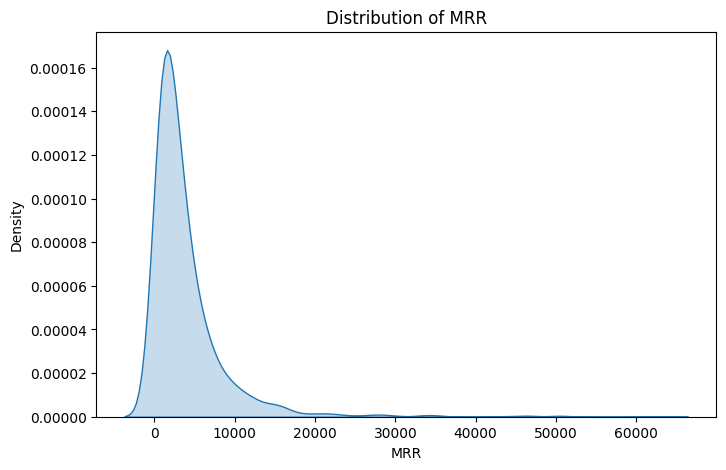

In [1295]:
plt.figure(figsize = (8, 5))
sns.kdeplot(df3['MRR'], fill = True)
plt.xlabel('MRR')
plt.title("Distribution of MRR")
plt.show()

**Eksenler:**

* **X Ekseni (Yatay):** MRR (Aylık Tekrarlayan Gelir) değerlerini gösterir.
* **Y Ekseni (Dikey):** Yoğunluğu gösterir. Yoğunluk, belirli bir MRR değerinde veri noktalarının ne kadar sık olduğunu gösterir. Yüksek yoğunluk, o MRR değerinin daha yaygın olduğu anlamına gelir.

**Grafiğin Yorumu:**

**- 1.Yoğunlaşma:**

* Grafik, MRR değerlerinin büyük çoğunluğunun düşük değerlerde yoğunlaştığını göstermektedir. Eğrinin en yüksek noktası, MRR'nin en sık gözlemlendiği değeri temsil eder. Bu, müşterilerin çoğunun düşük MRR değerlerine sahip olduğunu gösterir.

* Grafikteki yüksek tepe noktası, verilerin büyük bölümünün sıfıra yakın değerlerde toplandığını gösteriyor.

  
**- 2.Sağa Çarpıklık:**

* Grafiğin sağa doğru uzun bir kuyruğu vardır. Bu, bazı müşterilerin çok yüksek MRR değerlerine sahip olduğunu gösterir. Ancak, bu yüksek MRR değerleri nispeten nadirdir.

* Grafiğin sağa doğru uzayan kuyruğu, yüksek MRR değerlerinin daha seyrek görüldüğünü ve daha geniş bir aralığa yayıldığını belirtiyor.


**- 3.Aykırı Değerler:**

* Grafiğin sağ kuyruğu, potansiyel aykırı değerleri gösterir. Bu, bazı müşterilerin diğerlerinden önemli ölçüde daha yüksek MRR'ye sahip olduğunu gösterir. Bu müşteriler, şirketin en değerli müşterileri olabilir
  
**- 4.Genel Dağılım:**

* Genel olarak, MRR dağılımı sağa çarpıktır. Bu, çoğu müşterinin düşük MRR'ye sahip olduğu, ancak az sayıda müşterinin çok yüksek MRR'ye sahip olduğu anlamına gelir.

  
**Çıkarımlar:**

**- Müşteri Segmentasyonu:**
* Şirket, müşterilerini MRR'ye göre segmentlere ayırabilir. Düşük ve yüksek MRR'li müşteriler için farklı stratejiler uygulanabilir.
* Düşük MRR'li müşterileri yüksek MRR'li müşterilere dönüştürme stratejileri geliştirilebilir.

**- Değerli Müşteriler:**
* Yüksek MRR'li müşterilere özel ilgi gösterilebilir. Bu müşterilerin elde tutulması, şirketin geliri için kritik öneme sahip olabilir.
  
**- Gelir Artırma Stratejileri:**
* Şirket, düşük MRR'li müşterilerin MRR'sini artırmak için stratejiler geliştirebilir.
* Müşteri başına ortalama geliri artırmaya yönelik çalışmalar yapılabilir.

**- Pazarlama ve Satış Stratejileri:**
* Hedef kitleye uygun pazarlama ve satış stratejileri geliştirilebilir.
* Yüksek MRR potansiyeli olan müşterilere odaklanılabilir.

In [1296]:
df4.head()

,Customer ID,Total Revenue
0,CRM-1470950,"$732,199"
1,CRM-1526100,$0
2,CRM-1506400,"$375,135"
3,CRM-1430550,$0
4,CRM-1485600,"$116,732"


In [1297]:
summarize_data(df4, "CUSTOMER REVENUE")


CUSTOMER REVENUE DATASET SUMMARY:
(901, 2)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    901 non-null    object
 1   Total Revenue  901 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB
None

 -------------------------------------------------- 

        Customer ID Total Revenue
count           901           901
unique          901           717
top     CRM-1470950            $0
freq              1           178

 -------------------------------------------------- 

Missing Values:
Customer ID      0
Total Revenue    0
dtype: int64

 -------------------------------------------------- 



## CUSTOMER REVENUE DATASET'İNİN SÜTUN AÇIKLAMASI: 
* "Customer ID" → Müşteri kimliği

* "Total Revenue" → Müşterinin, E-corp ürünlerini kullanarak elde ettiği toplam gelir miktarını gösterir.

In [1298]:
df4["Total Revenue"] = df4["Total Revenue"].astype(str).str.replace(r"[^\d.]", "", regex = True)
df4["Total Revenue"] = pd.to_numeric(df4["Total Revenue"], errors = "coerce")


* **"MRR"** sütununda olduğu gibi **"Total Revenue"** sütunundaki verileri **sayısal (numeric)** formata dönüştürdüm. 

In [1299]:
summarize_data(df4, "CUSTOMER REVENUE")


CUSTOMER REVENUE DATASET SUMMARY:
(901, 2)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    901 non-null    object
 1   Total Revenue  901 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB
None

 -------------------------------------------------- 

       Total Revenue
count   9.010000e+02
mean    1.259107e+07
std     1.218891e+08
min     0.000000e+00
25%     5.790000e+02
50%     6.074100e+04
75%     4.542900e+05
max     2.789805e+09

 -------------------------------------------------- 

Missing Values:
Customer ID      0
Total Revenue    0
dtype: int64

 -------------------------------------------------- 



# Total Revenue Sütunun Density Grafiği

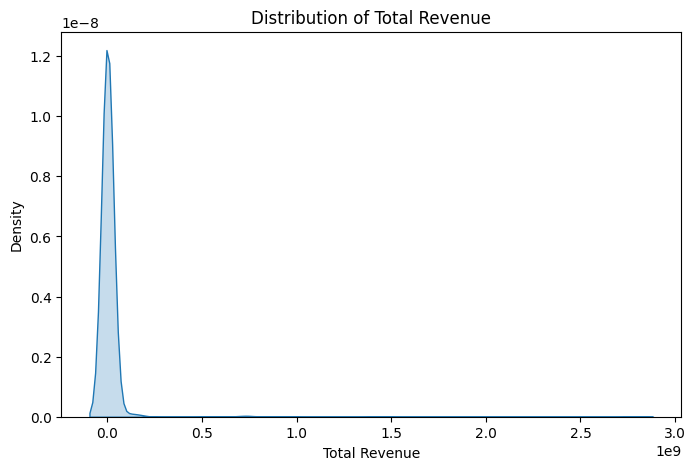

In [1300]:
plt.figure(figsize = (8, 5))
sns.kdeplot(df4['Total Revenue'], fill = True)
plt.xlabel('Total Revenue')
plt.title("Distribution of Total Revenue")
plt.show()

**Eksenler ve Bilimsel Gösterim:**

**- X Ekseni (Yatay):**
* "Toplam Gelir"i temsil eder.
* Eksenin altında "1e9" (1 x 10⁹) yazmaktadır. Bu, yatay eksendeki değerlerin milyar biriminde olduğunu gösterir. Örneğin, 1 değeri 1 milyar birimi temsil eder.

**- Y Ekseni (Dikey):**
* "Yoğunluk"u temsil eder.
* Eksenin solunda "1e-8" (1 x 10⁻⁸) yazmaktadır. Bu, dikey eksendeki yoğunluk değerlerinin çok küçük olduğunu gösterir. Yani, eksendeki 1 değeri 0,00000001 birimi temsil eder.
  
**Grafiğin Yorumu :**

**1.Yoğunlaşma:**

* Grafik, toplam gelirin büyük bir kısmının sıfıra yakın değerlerde (milyarlarca birimde) yoğunlaştığını göstermektedir. Eğrinin en yüksek noktası, toplam gelirin en sık gözlemlendiği değeri temsil eder.
* Grafikteki yüksek tepe noktası, müşterilerin büyük bir çoğunluğunun çok düşük toplam gelir değerlerine sahip olduğunu gösterir.

**2.Sağa Çarpıklık:**

* Grafiğin sağa doğru uzun bir kuyruğu vardır. Bu, bazı müşterilerin çok yüksek toplam gelir değerlerine (milyarlarca birimde) sahip olduğunu gösterir. Ancak, bu yüksek toplam gelir değerleri nispeten nadirdir.
* Bu, gelir dağılımında büyük eşitsizlikler olduğunu gösterir.

**3.Aykırı Değerler:**

* Grafiğin sağ kuyruğu, potansiyel aykırı değerleri gösterir. Bu, bazı müşterilerin diğerlerinden önemli ölçüde daha yüksek toplam gelire sahip olduğunu gösterir.
  
* Bu aykırı değerler, şirketin gelirinin büyük bir kısmını oluşturan çok önemli müşterileri temsil ediyor olabilir.

**4.Genel Dağılım:**

*Genel olarak, toplam gelir dağılımı sağa çarpıktır. Bu, çoğu müşterinin düşük toplam gelire sahip olduğu, ancak az sayıda müşterinin çok yüksek toplam gelire sahip olduğu anlamına gelir.
*Yoğunluk değerlerinin çok küçük olması, bu dağılımın geniş bir aralığa yayıldığını ve verilerin seyrek olduğunu gösterir.

**Çıkarımlar:**

* Şirketin gelir yapısı, az sayıda çok yüksek gelir getiren müşteriye dayanmaktadır.
* Müşteri segmentasyonu yaparken, bu yüksek gelirli müşterilere özel önem verilmelidir.
* Gelir artırma stratejileri geliştirirken, düşük gelirli müşterilerin potansiyeli de göz önünde bulundurulmalıdır.
* Pazarlama ve satış stratejileri, hem yüksek gelirli hem de düşük gelirli müşterilere uygun şekilde uyarlanmalıdır.

In [1301]:
df5.head()

,Customer ID,Help Ticket Count,Help Ticket Lead Time (hours)
0,CRM-1516050,9,418
1,CRM-1467150,8,382
2,CRM-1470950,30,366
3,CRM-1526100,4,1206
4,CRM-1506400,22,484


In [1302]:
summarize_data(df5, "HELP TICKET")


HELP TICKET DATASET SUMMARY:
(1367, 3)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer ID                    1367 non-null   object
 1   Help Ticket Count              1367 non-null   int64 
 2   Help Ticket Lead Time (hours)  1367 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 32.2+ KB
None

 -------------------------------------------------- 

       Help Ticket Count  Help Ticket Lead Time (hours)
count        1367.000000                    1367.000000
mean           17.397952                     786.302853
std            25.354291                     672.856978
min             1.000000                       0.000000
25%             3.000000                     387.500000
50%             9.000000                     603.000000
7

## HELP TICKET DATASET'İNİN SÜTUN AÇIKLAMASI: 
* "Customer ID" → Müşteri kimliği

* "Help Ticket Count" → Müşterinin, müşteri destek ekibinden yardım almak için oluşturduğu toplam talep sayısını gösterir.

* "Help Ticket Lead Time(hours)" → İlgili müşteri tarafından oluşturulan taleplerin ortalama çözüm süresini gösterir.

# "Help Ticket Count" ve "Help Ticket Lead Time (hours)" Sütunları Arasındaki İlişkiyi gösteren Scatter Grafiği



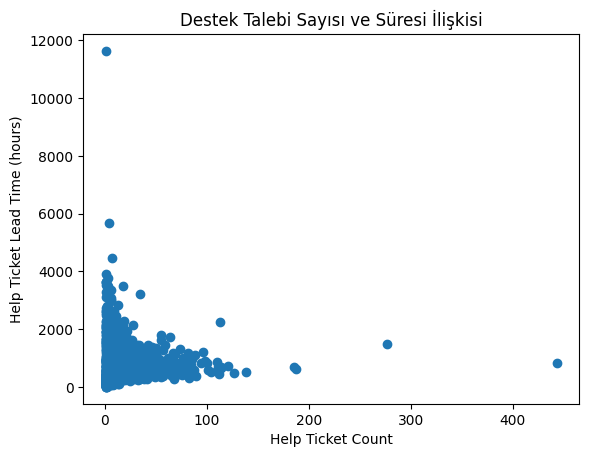

In [1303]:
plt.scatter(df5['Help Ticket Count'], df5['Help Ticket Lead Time (hours)'])
plt.xlabel('Help Ticket Count')
plt.ylabel('Help Ticket Lead Time (hours)')
plt.title('Destek Talebi Sayısı ve Süresi İlişkisi')
plt.show()


**Dağılım:**

* Grafikteki noktaların büyük bir kısmı sol alt köşede yoğunlaşmıştır. Bu, çoğu müşterinin düşük sayıda destek talebi gönderdiğini ve bu taleplerin kısa sürede çözüldüğünü gösterir.

* Noktaların sağa doğru seyrek bir şekilde dağıldığı görülmektedir. Bu, bazı müşterilerin çok sayıda destek talebi gönderdiğini ve bu taleplerin uzun sürdüğünü gösterir.

**Aykırı Değerler (Outliers):**

* Grafikte birkaç aykırı değer bulunmaktadır. Özellikle, sol üst köşede ve sağ üst köşede bulunan noktalar dikkat çekicidir.
  
* Sol üst köşedeki nokta, düşük sayıda destek talebi gönderen ancak talebi çok uzun süren bir müşteriyi temsil edebilir.

* Sağ üst köşedeki nokta, çok sayıda destek talebi gönderen ve talebi çok uzun süren bir müşteriyi temsil edebilir.

* Sağ alt köşedeki nokta, çok sayıda destek talebi gönderen ancak talebi kısa sürede çözülen bir müşteriyi temsil ediyor olabilir.

**İlişki:**

* Grafikte belirgin bir doğrusal ilişki görülmemektedir. Yani, destek talebi sayısı arttıkça destek talebi süresi de artacak diye bir durum söz konusu değildir.
 
* Ancak, aykırı değerleri göz ardı edersek, düşük sayıda destek talebi gönderen müşterilerin taleplerinin daha kısa sürede çözüldüğü söylenebilir.

**Çıkarımlar:**

* Müşterilerin büyük bir kısmı düşük sayıda destek talebi gönderiyor ve bu talepler kısa sürede çözülüyor.

* Bazı müşteriler çok sayıda destek talebi gönderiyor ve bu talepler uzun sürüyor.
* Destek talebi sayısı ile destek talebi süresi arasında doğrusal bir ilişki yok.
* Aykırı değerler, şirketin destek süreçlerinde iyileştirme yapması gereken alanları gösterebilir.

In [1304]:
df6.head()

,Customer ID,Company Newsletter Interaction Count
0,CRM-160150,54
1,CRM-166800,27
2,CRM-927200,24
3,CRM-1526050,23
4,CRM-1489600,20


In [1305]:
summarize_data(df6, "NEWSLETTER INTERACTION")


NEWSLETTER INTERACTION DATASET SUMMARY:
(251, 2)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Customer ID                           251 non-null    object
 1   Company Newsletter Interaction Count  251 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB
None

 -------------------------------------------------- 

       Company Newsletter Interaction Count
count                            251.000000
mean                               4.414343
std                                5.374350
min                                1.000000
25%                                2.000000
50%                                3.000000
75%                                5.000000
max                               54.000000

 -------------------

## NEWSLETTER INTERACTION DATASET'İNİN SÜTUN AÇIKLAMASI: 
* "Customer ID" → Müşteri kimliği

* "Company Newsletter Interaction Count" → Müşterinin, E-corp tarafından gönderilen bültenlerle kaç kez etkileşime geçtiğini gösterir.

# Company Newsletter Interaction Count Sütunun Density Grafiği

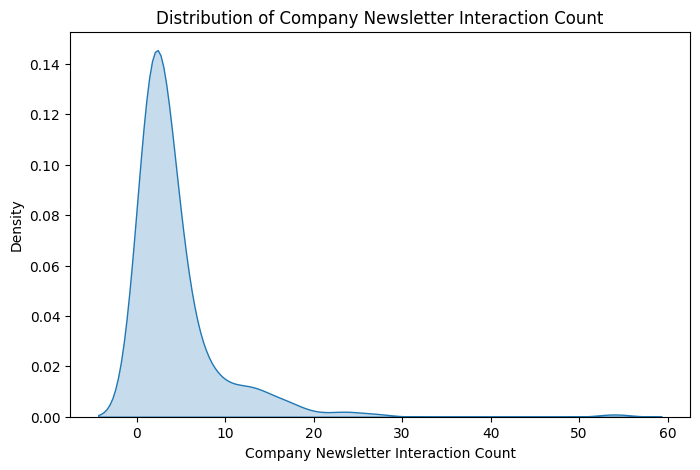

In [1306]:
plt.figure(figsize = (8, 5))
sns.kdeplot(df6['Company Newsletter Interaction Count'], fill = True)
plt.xlabel('Company Newsletter Interaction Count')
plt.title("Distribution of Company Newsletter Interaction Count")
plt.show()

**Yoğunlaşma:**

* Grafik, şirket bülteni etkileşim sayısının büyük bir kısmının sıfıra yakın değerlerde yoğunlaştığını göstermektedir. Eğrinin en yüksek noktası, etkileşim sayısının en sık gözlemlendiği değeri temsil eder.

* Grafikteki yüksek tepe noktası, müşterilerin büyük bir çoğunluğunun şirket bülteniyle çok az etkileşimde bulunduğunu veya hiç etkileşimde bulunmadığını gösteriyor.

**Sağa Çarpıklık:**

* Grafiğin sağa doğru uzun bir kuyruğu vardır. Bu, bazı müşterilerin şirket bülteniyle çok yüksek etkileşim sayısına sahip olduğunu gösterir. Ancak, bu yüksek etkileşim sayıları nispeten nadirdir.
* Bu, etkileşim dağılımında büyük eşitsizlikler olduğunu gösterir.

**Aykırı Değerler:**

* Grafiğin sağ kuyruğu, potansiyel aykırı değerleri gösterir. Bu, bazı müşterilerin diğerlerinden önemli ölçüde daha yüksek etkileşim sayısına sahip olduğunu gösterir.

* Bu aykırı değerler, şirketin en aktif ve ilgili müşterilerini temsil ediyor olabilir.

**Genel Dağılım:**

* Genel olarak, şirket bülteni etkileşim sayısı dağılımı sağa çarpıktır. Bu, çoğu müşterinin düşük etkileşim sayısına sahip olduğu, ancak az sayıda müşterinin çok yüksek etkileşim sayısına sahip olduğu anlamına gelir.

* Yoğunluk değerlerinin en yüksek seviyede olduğu bölge, bültenle etkileşimin en az olduğu bölgeyi temsil ediyor.


**Çıkarımlar:**

* Şirket bülteni, müşterilerin büyük bir kısmı tarafından aktif olarak takip edilmiyor veya etkileşimde bulunulmuyor.
  
* Az sayıda müşteri, şirket bülteniyle yoğun bir şekilde etkileşimde bulunuyor.

* Şirket, müşteri etkileşimini artırmak için stratejiler geliştirmeli.

* Yüksek etkileşimde bulunan müşterilere özel ilgi gösterilebilir.

In [1307]:
df7.head()

,Customer ID,Product Bug Task Count
0,CRM-1526150,179
1,CRM-1477300,150
2,CRM-1450300,66
3,CRM-661350,116
4,CRM-1435450,106


In [1308]:
summarize_data(df7, "PRODUCT BUG TASK")


PRODUCT BUG TASK DATASET SUMMARY:
(1989, 2)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             1989 non-null   object
 1   Product Bug Task Count  1989 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.2+ KB
None

 -------------------------------------------------- 

       Product Bug Task Count
count             1989.000000
mean               141.328306
std                 40.094410
min                  5.000000
25%                113.000000
50%                150.000000
75%                174.000000
max                200.000000

 -------------------------------------------------- 

Missing Values:
Customer ID               0
Product Bug Task Count    0
dtype: int64

 -------------------------------------------------- 



## PRODUCT BUG TASK DATASET'İNİN SÜTUN AÇIKLAMASI: 
* "Customer ID" → Müşteri kimliği

* "Product Bug Task Count" → Müşteri tarafından bildirilen veya müşteriyle ilişkilendirilen hata sayısı.

# Product Bug Task Count Sütunun Density Grafiği

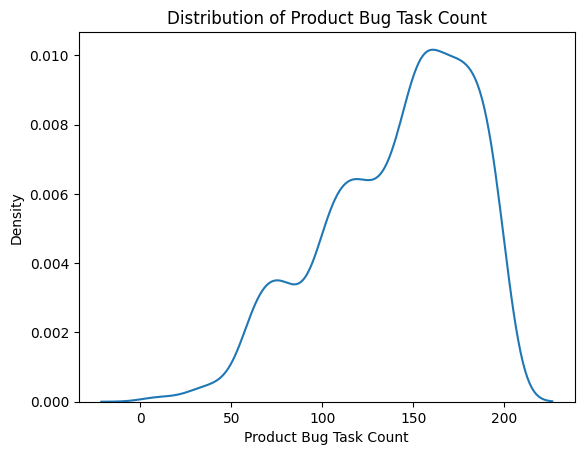

In [1309]:
import seaborn as sns

sns.kdeplot(df7['Product Bug Task Count'])
plt.xlabel('Product Bug Task Count')
plt.title('Distribution of Product Bug Task Count')
plt.show()

**Yoğunlaşma**

* Grafik, iki belirgin yoğunlaşma (peak) noktası içeriyor.

* İlk yoğunlaşma yaklaşık 75-100 aralığında, ikinci yoğunlaşma ise 150-175 civarında.

* Bu, verinin iki farklı grup halinde toplandığını ve bimodal (çift tepe) bir dağılım gösterdiğini düşündürür.

**Çarpıklık Açısından:**

* Dağılım sağa çarpık (pozitif çarpıklık) gibi görünüyor, çünkü sağ tarafta uzun bir kuyruk var.

* Yani, büyük değerler daha seyrek bulunuyor, ancak bazı yüksek değerli gözlemler mevcut.

* Bu durum, ürün hatalarıyla ilgili bazı ürünlerin çok fazla hata almasına rağmen genel çoğunluğun daha düşük hata sayısına sahip olabileceğini gösteriyor.

**Aykırı Değerler Açısından:**

* Yoğunluk grafiğinin sağ kuyruğunun uzaması, birkaç yüksek değerli aykırı gözlem olabileceğine işaret ediyor.

* Aykırı değerler, özellikle 200’ün üzerinde olan kısımda görülebilir.

**Genel Dağılım:**

* Dağılım iki modlu (bimodal), yani veride iki farklı grup bulunuyor olabilir.

* İlk grup düşük hata sayısına sahip ürünler, ikinci grup ise çok daha yüksek hata sayısına sahip ürünlerden oluşabilir.

* Eğer bu bir ürün geliştirme süreciyle ilgiliyse, bazı ürünlerin oldukça fazla hata içerdiği, diğerlerinin ise daha stabil olduğu anlamına gelebilir.

**Çıkarımlar:**

* Ürünlerin hata sayısında belirgin iki grup var, bu yüzden ürünleri kategorize etmek faydalı olabilir.

* Yüksek hata alan ürünlere özel önlemler almak gerekebilir.

* Aykırı değerlerin neden kaynaklandığını analiz etmek, olası sistemsel hataları belirlemek açısından önemli olabilir.

* Eğer zamanla hata sayısında birikim oluyorsa, ürün geliştirme sürecinde kalite kontrol eksiklikleri olabilir.

In [1310]:
df8.head()

,Customer ID,Region,Vertical,Subvertical
0,CRM-1471650,Malaysia,Media and Publishing,Content Websites
1,CRM-1516050,Taiwan,Retail,Fashion Retailer
2,CRM-1087300,Australia,Transportation and Logistics,Transportation and Logistics
3,CRM-1467150,Taiwan,Retail,Marketplace
4,CRM-230550,Turkey,Retail,Fashion Retailer


In [1311]:
summarize_data(df8, "REGION AND VERTICAL")


REGION AND VERTICAL DATASET SUMMARY:
(2655, 4)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2651 non-null   object
 1   Region       2654 non-null   object
 2   Vertical     2585 non-null   object
 3   Subvertical  2549 non-null   object
dtypes: object(4)
memory usage: 83.1+ KB
None

 -------------------------------------------------- 

        Customer ID  Region Vertical       Subvertical
count          2651    2654     2585              2549
unique         2651      23       22                50
top     CRM-1471650  Turkey   Retail  Fashion Retailer
freq              1     670     1510               407

 -------------------------------------------------- 

Missing Values:
Customer ID      4
Region           1
Vertical        70
Subvertical    106
dtype: int64

 -------

## REGION AND VERTICAL DATASET'İNİN SÜTUN AÇIKLAMASI: 
* "Customer ID" → Müşteri kimliği

* "Region" → Müşterinin bulunduğu bölge.

* "Vertical" → Müşterinin sektör bilgisi

* "Subvertical" → Daha spesifik sektör bilgisi 


# REGION AND VERTICAL DATASETİNİN GRAFİKLERLE İNCELENMESİ


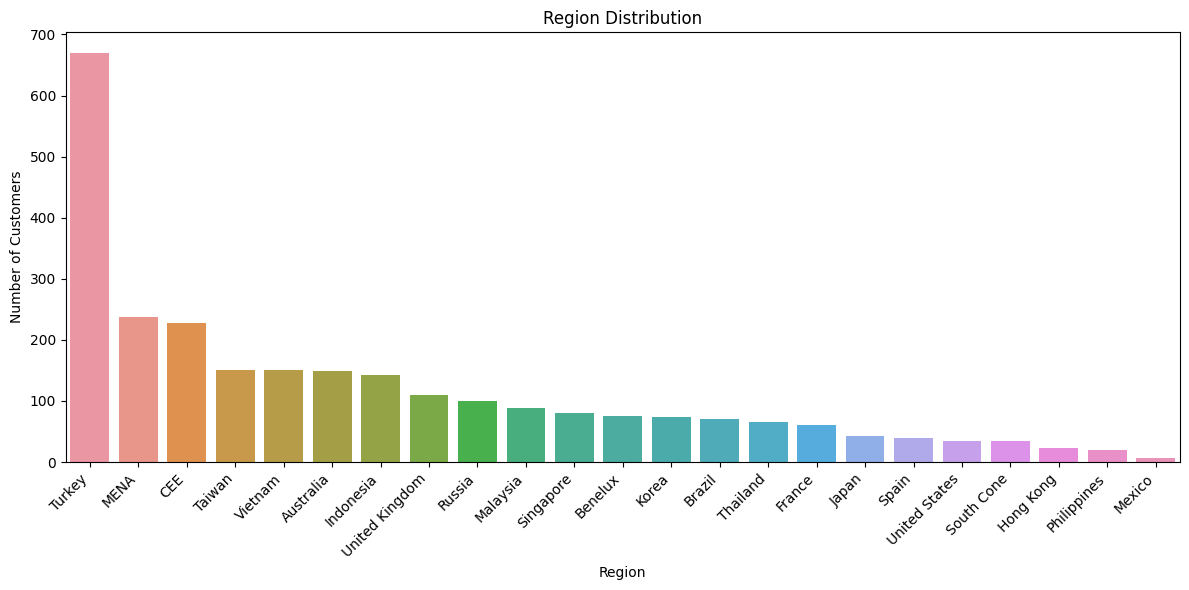

In [1312]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df8, x = 'Region', order = df8['Region'].value_counts().index)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Region Dağılımı:**

* Grafik, "Türkiye" bölgesinin en fazla müşteri sayısına sahip olduğunu göstermektedir.

* "MENA" ve "CEE" bölgeleri de yüksek müşteri sayılarına sahiptir.

* Diğer bölgelerin müşteri sayıları daha düşüktür.

* "Meksika" bölgesi en az müşteri sayısına sahiptir.

**Müşteri Sayıları:**

* "Türkiye" bölgesinde yaklaşık 670 müşteri bulunmaktadır.

* "MENA" ve "CEE" bölgelerinde yaklaşık 230-240 müşteri bulunmaktadır.

* Diğer bölgelerde müşteri sayıları 200'ün altındadır.

**Genel Eğilim:**

* Grafik, müşteri sayılarının bölgelere göre büyük ölçüde değiştiğini göstermektedir.

* Bazı bölgeler çok sayıda müşteriye sahipken, bazı bölgeler çok az müşteriye sahiptir.

* Bu, şirketin farklı bölgelerdeki pazar payının farklı olduğunu gösterir.

**Çıkarımlar:**

* Şirketin "Türkiye" pazarında güçlü bir varlığı bulunmaktadır.

* "MENA" ve "CEE" pazarları da şirket için önemlidir.

* Şirketin diğer pazarlardaki varlığı daha zayıftır.

* Şirket, zayıf olduğu pazarlarda büyüme stratejileri geliştirebilir.

**Öneriler:**

* Şirket, "Türkiye" pazarındaki başarısını diğer pazarlara taşımak için stratejiler geliştirebilir.

* Şirket, zayıf olduğu pazarlardaki müşteri sayısını artırmak için pazarlama ve satış faaliyetlerine ağırlık verebilir.

* Şirket, farklı bölgelerdeki müşteri ihtiyaçlarını daha iyi anlamak için pazar araştırması yapabilir.

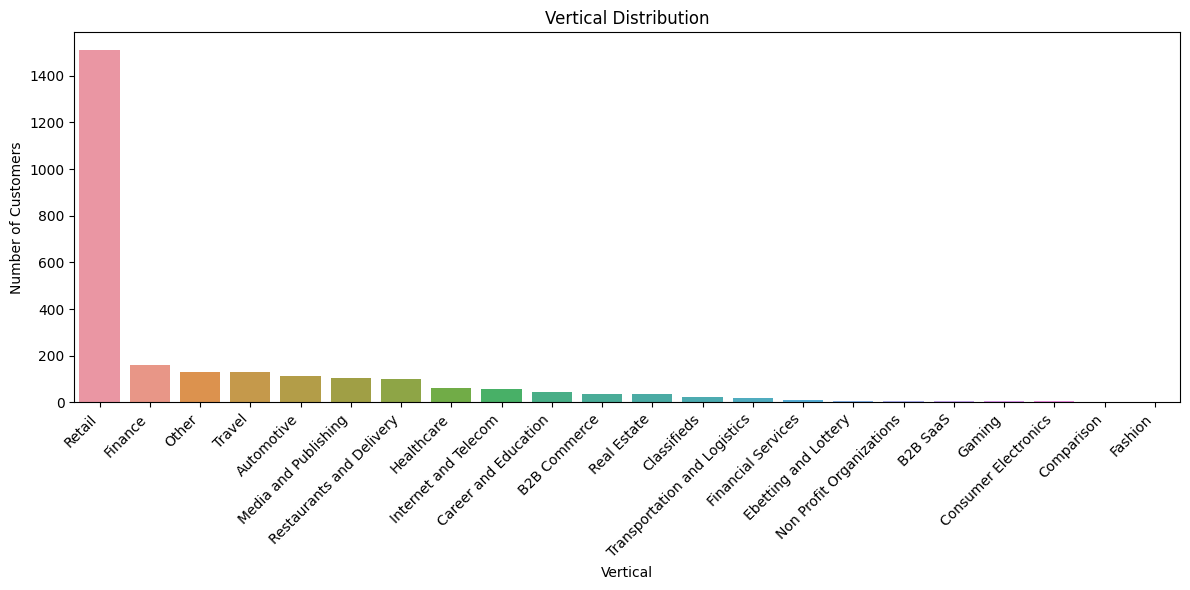

In [1313]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df8, x = 'Vertical', order = df8['Vertical'].value_counts().index)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Vertical Distribution')
plt.xlabel('Vertical')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Vertical Dağılımı:**

* Grafik, "Perakende" (Retail) sektörünün açık ara en fazla müşteri sayısına sahip olduğunu göstermektedir.

* "Finans" (Finance) ve "Diğer" (Other) sektörleri de nispeten yüksek müşteri sayılarına sahiptir.

* Diğer sektörlerin müşteri sayıları oldukça düşüktür.

* "Moda" (Fashion) sektörü en az müşteri sayısına sahiptir.

**Müşteri Sayıları:**

* "Perakende" sektöründe yaklaşık 1500 müşteri bulunmaktadır.

* "Finans" ve "Diğer" sektörlerinde yaklaşık 150-200 müşteri bulunmaktadır.

* Diğer sektörlerde müşteri sayıları 100'ün altındadır.

**Genel Eğilim:**

* Grafik, müşteri sayılarının dikey sektörlere göre büyük ölçüde değiştiğini göstermektedir.

* "Perakende" sektörü açık ara en baskın sektördür.

* Diğer sektörler arasında büyük bir çeşitlilik bulunmaktadır, ancak müşteri sayıları genellikle düşüktür.

* Bu, şirketin "Perakende" sektöründe güçlü bir uzmanlığa sahip olduğunu ve diğer sektörlerde daha az aktif olduğunu gösterir.

**Çıkarımlar:**

* Şirketin "Perakende" sektöründe çok güçlü bir varlığı bulunmaktadır.

* "Finans" ve "Diğer" sektörleri de şirket için önemlidir, ancak "Perakende" kadar baskın değildir.

* Şirketin diğer sektörlerdeki varlığı oldukça zayıftır.
* Şirket, "Perakende" sektöründeki başarısını diğer sektörlere taşımak için stratejiler geliştirebilir.

**Öneriler:**

* Şirket, "Perakende" sektöründeki uzmanlığını kullanarak bu sektördeki pazar payını daha da artırabilir.

* Şirket, "Finans" ve "Diğer" sektörlerindeki varlığını güçlendirmek için stratejiler geliştirebilir.

* Şirket, zayıf olduğu sektörlerde büyüme stratejileri geliştirebilir veya bu sektörlere odaklanıp odaklanmayacağına karar verebilir.

* Şirket, farklı sektörlerdeki müşteri ihtiyaçlarını daha iyi anlamak için pazar araştırması yapabilir.

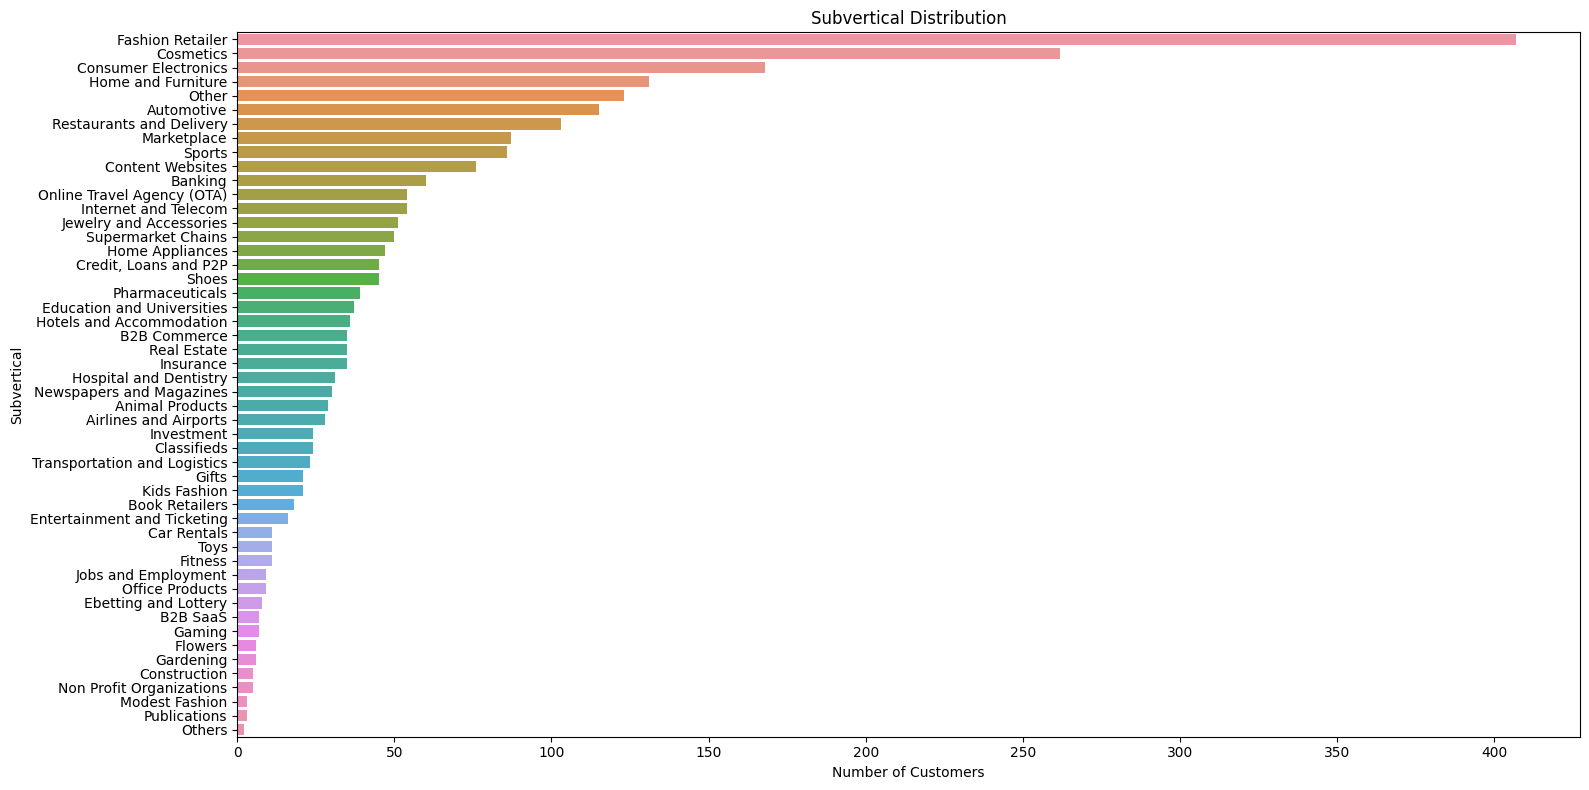

In [1314]:

plt.figure(figsize = (16, 8))
sns.countplot(data = df8, y = 'Subvertical', order = df8['Subvertical'].value_counts().index)
plt.title('Subvertical Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Subvertical')
plt.tight_layout()
plt.show()

**Eksenler:**

* **Y Ekseni (Dikey):** "Subvertical"
* **X Ekseni (Yatay):** "Number of Customers"

**Alt Dikey Sektör Dağılımı:**

* Grafik, "Moda Perakendecisi" (Fashion Retailer) alt sektörünün açık ara en fazla müşteri sayısına sahip olduğunu göstermektedir.

* "Kozmetik" (Cosmetics), "Tüketici Elektroniği" (Consumer Electronics) ve "Ev ve Mobilya" (Home and Furniture) alt sektörleri de nispeten yüksek müşteri sayılarına sahiptir.

* Diğer alt sektörlerin müşteri sayıları oldukça düşüktür.

* "Diğerleri" (Others) alt sektörü en az müşteri sayısına sahiptir.

**Müşteri Sayıları:**

* "Moda Perakendecisi" alt sektöründe yaklaşık 400 müşteri bulunmaktadır.

* "Kozmetik" alt sektöründe yaklaşık 150 müşteri bulunmaktadır.

* "Tüketici Elektroniği" ve "Ev ve Mobilya" alt sektörlerinde yaklaşık 100-120 müşteri bulunmaktadır.

* Diğer alt sektörlerde müşteri sayıları 50'nin altındadır.

**Genel Eğilim:**

* Grafik, müşteri sayılarının alt dikey sektörlere göre büyük ölçüde değiştiğini göstermektedir.

* "Moda Perakendecisi" alt sektörü açık ara en baskın alt sektördür.

* Diğer alt sektörler arasında büyük bir çeşitlilik bulunmaktadır, ancak müşteri sayıları genellikle düşüktür.

* Bu, şirketin "Moda Perakendecisi" alt sektöründe çok güçlü bir uzmanlığa sahip olduğunu ve diğer alt sektörlerde daha az aktif olduğunu gösterir.

**Çıkarımlar:**

* Şirketin "Moda Perakendecisi" alt sektöründe çok güçlü bir varlığı bulunmaktadır.

* "Kozmetik", "Tüketici Elektroniği" ve "Ev ve Mobilya" alt sektörleri de şirket için önemlidir, ancak

* "Moda Perakendecisi" kadar baskın değildir.

* Şirketin diğer alt sektörlerdeki varlığı oldukça zayıftır.

* Şirket, "Moda Perakendecisi" alt sektöründeki başarısını diğer alt sektörlere taşımak için stratejiler geliştirebilir.

**Öneriler:**

* Şirket, "Moda Perakendecisi" alt sektöründeki uzmanlığını kullanarak bu sektördeki pazar payını daha da artırabilir.

* Şirket, "Kozmetik", "Tüketici Elektroniği" ve "Ev ve Mobilya" alt sektörlerindeki varlığını güçlendirmek için stratejiler geliştirebilir.

* Şirket, zayıf olduğu alt sektörlerde büyüme stratejileri geliştirebilir veya bu alt sektörlere odaklanıp odaklanmayacağına karar verebilir.

* Şirket, farklı alt sektörlerdeki müşteri ihtiyaçlarını daha iyi anlamak için pazar araştırması yapabilir.

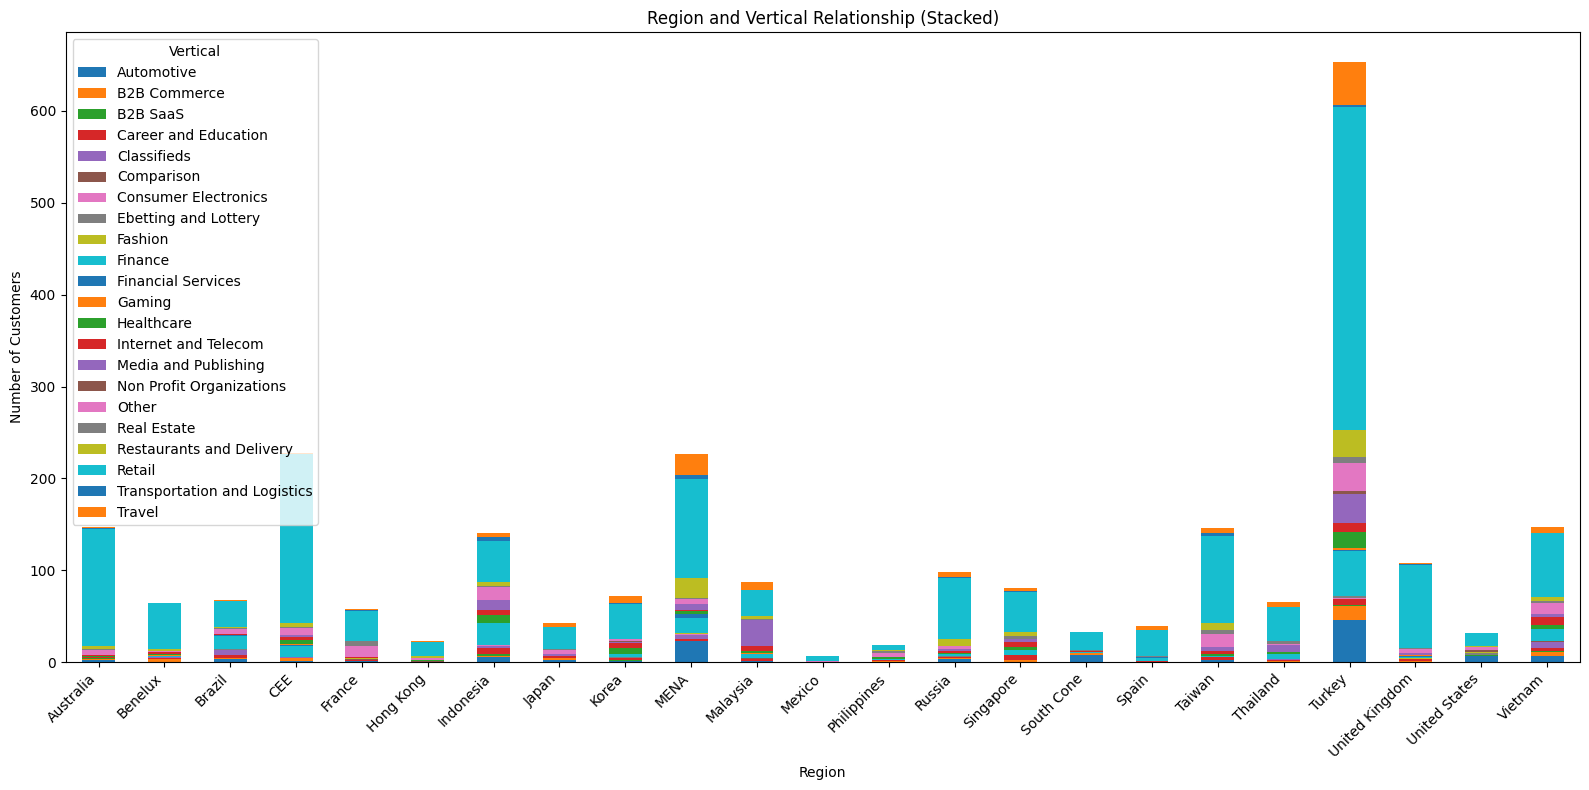

In [1315]:
cross_tab = pd.crosstab(df8['Region'], df8['Vertical'])
cross_tab.plot(kind = 'bar', stacked = True, figsize = (16, 8))
plt.title('Region and Vertical Relationship (Stacked)')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

**Region ve Vertical İlişkisi:**

* Grafik, farklı bölgelerdeki dikey sektör dağılımlarını karşılaştırmamızı sağlar.

* "Türkiye" bölgesinin açık ara en fazla müşteri sayısına sahip olduğu görülmektedir.

* "Türkiye" bölgesinde "Perakende" (Retail) sektörünün baskın olduğu görülmektedir.

* "MENA" ve "CEE" bölgelerinde de "Perakende" sektörünün önemli bir paya sahip olduğu görülmektedir.

* Diğer bölgelerde dikey sektör dağılımları daha çeşitlidir.

**Vertical Dağılımı:**

* "Perakende" (Retail) sektörü birçok bölgede önemli bir paya sahiptir.

* "Finans" (Finance) sektörü de bazı bölgelerde (özellikle "Türkiye") önemli bir paya sahiptir.

* Diğer sektörlerin dağılımları bölgelere göre değişiklik göstermektedir.

**Genel Eğilim:**

* Grafik, "Türkiye" bölgesinin hem müşteri sayısı hem de "Perakende" sektöründeki baskınlığı ile öne çıktığını göstermektedir.

* "Perakende" sektörü, şirketin birçok bölgedeki en önemli sektörüdür.

* Farklı bölgelerde farklı sektörlerin öne çıktığı görülmektedir.

**Çıkarımlar:**

* Şirketin "Türkiye" pazarında güçlü bir varlığı bulunmaktadır ve bu pazarda "Perakende" sektörü baskındır.

* Şirketin "Perakende" sektörü, birçok bölgedeki en önemli sektörüdür.

* Şirket, farklı bölgelerdeki pazar dinamiklerini ve müşteri ihtiyaçlarını dikkate alarak stratejiler geliştirmelidir.

**Öneriler:**

* Şirket, "Türkiye" pazarındaki başarısını diğer pazarlara taşımak için stratejiler geliştirebilir.

* Şirket, "Perakende" sektöründeki uzmanlığını kullanarak bu sektördeki pazar payını daha da artırabilir.

* Şirket, farklı bölgelerdeki müşteri ihtiyaçlarını daha iyi anlamak için pazar araştırması yapabilir.

* Şirket, farklı bölgelerde öne çıkan sektörlere odaklanarak büyüme stratejileri geliştirebilir.

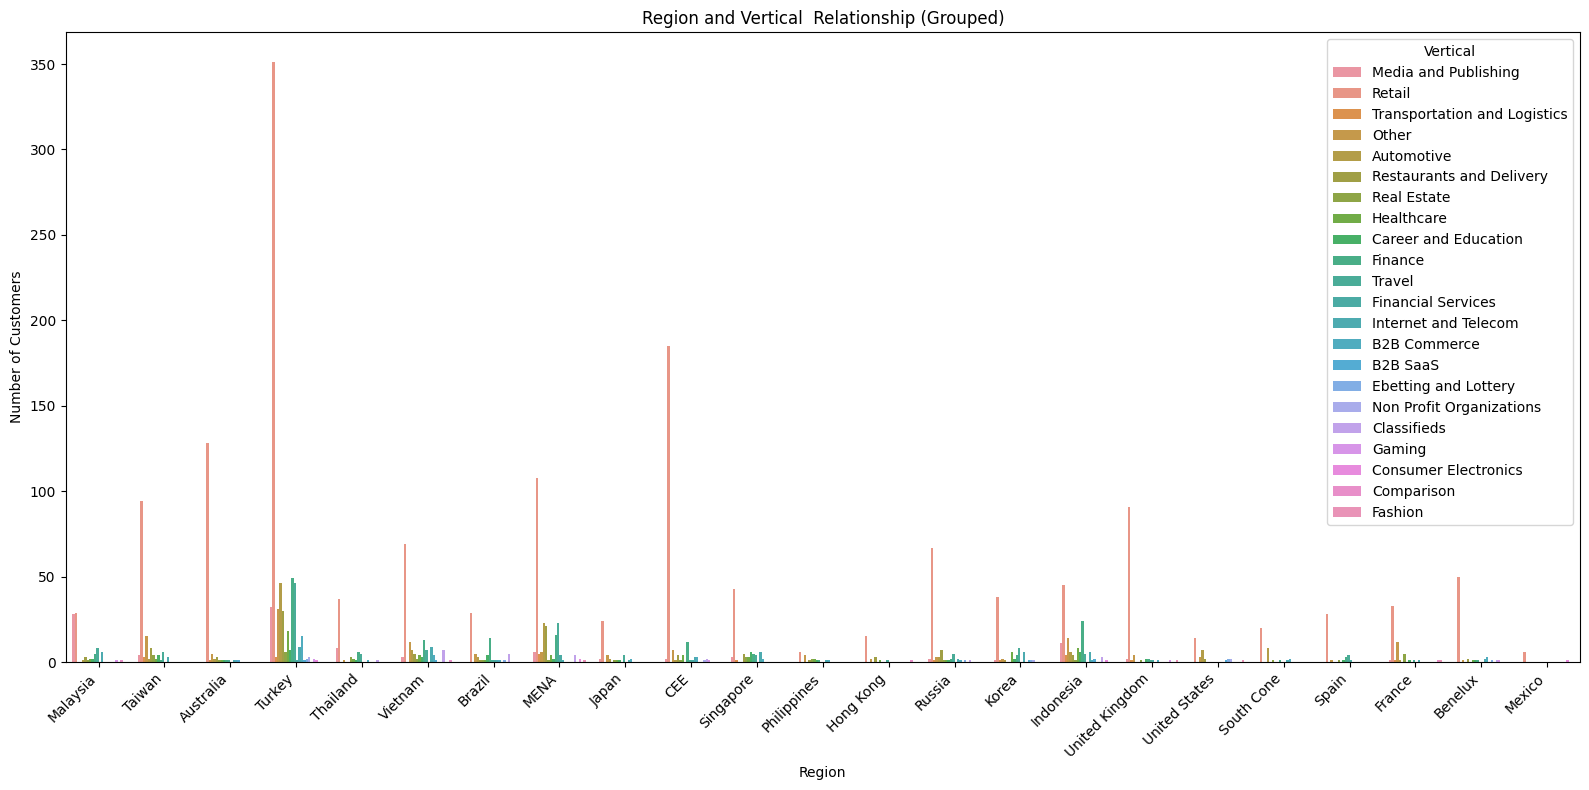

In [1316]:
plt.figure(figsize = (16, 8))
sns.countplot(data = df8, x = 'Region', hue = 'Vertical')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Region and Vertical  Relationship (Grouped)')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Region ve Vertical İlişkisi:**

* Grafik, farklı bölgelerdeki dikey sektör dağılımlarını karşılaştırmamızı sağlar.

* "Türkiye" bölgesinin açık ara en fazla müşteri sayısına sahip olduğu görülmektedir.

* "Türkiye" bölgesinde "Perakende" (Retail) sektörünün baskın olduğu görülmektedir.

* "MENA" ve "CEE" bölgelerinde de "Perakende" sektörünün önemli bir paya sahip olduğu görülmektedir.

* Diğer bölgelerde dikey sektör dağılımları daha çeşitlidir.

**Vertical Dağılımı:**

* "Perakende" (Retail) sektörü birçok bölgede önemli bir paya sahiptir.

* "Finans" (Finance) sektörü de bazı bölgelerde (özellikle "Türkiye") önemli bir paya sahiptir.

* Diğer sektörlerin dağılımları bölgelere göre değişiklik göstermektedir.

**Genel Eğilim:**

* Grafik, "Türkiye" bölgesinin hem müşteri sayısı hem de "Perakende" sektöründeki baskınlığı ile öne çıktığını göstermektedir.

* "Perakende" sektörü, şirketin birçok bölgedeki en önemli sektörüdür.

* Farklı bölgelerde farklı sektörlerin öne çıktığı görülmektedir.

**Çıkarımlar:**

* Şirketin "Türkiye" pazarında güçlü bir varlığı bulunmaktadır ve bu pazarda "Perakende" sektörü baskındır.
  
* Şirketin "Perakende" sektörü, birçok bölgedeki en önemli sektörüdür.

* Şirket, farklı bölgelerdeki pazar dinamiklerini ve müşteri ihtiyaçlarını dikkate alarak stratejiler geliştirmelidir.

**Öneriler:**

* Şirket, "Türkiye" pazarındaki başarısını diğer pazarlara taşımak için stratejiler geliştirebilir.

* Şirket, "Perakende" sektöründeki uzmanlığını kullanarak bu sektördeki pazar payını daha da artırabilir.

* Şirket, farklı bölgelerdeki müşteri ihtiyaçlarını daha iyi anlamak için pazar araştırması yapabilir.

* Şirket, farklı bölgelerde öne çıkan sektörlere odaklanarak büyüme stratejileri geliştirebilir.

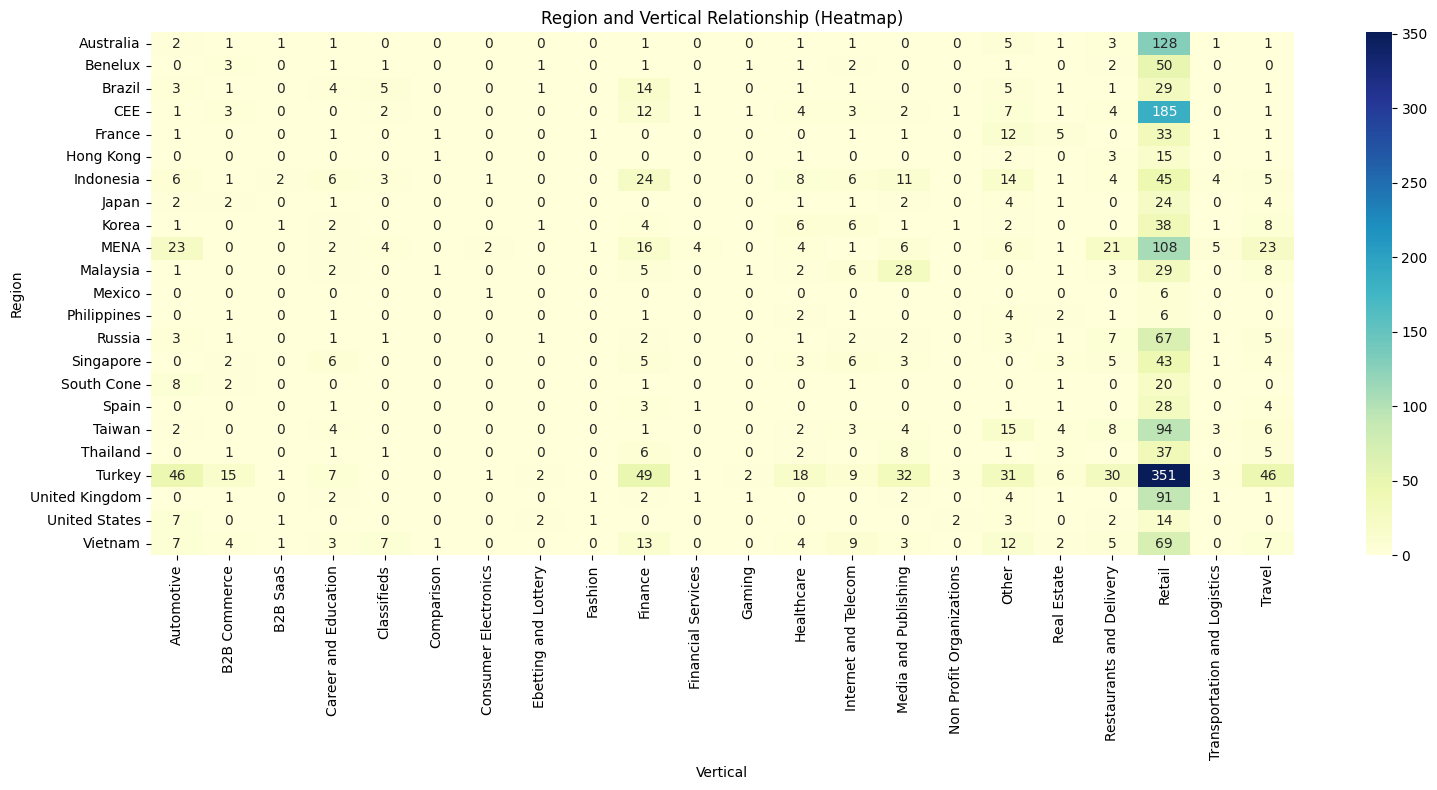

In [1317]:
cross_tab = pd.crosstab(df8['Region'], df8['Vertical'])

plt.figure(figsize = (16, 8))
sns.heatmap(cross_tab, cmap = 'YlGnBu', annot = True, fmt = 'd')
plt.title('Region and Vertical Relationship (Heatmap)')
plt.xlabel('Vertical')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


**Grafik Türü:**

* Bu, ısı haritası (heatmap) olarak adlandırılır. İki kategorik değişken arasındaki ilişkiyi görselleştirmek için kullanılır. Bu durumda, "Region" ve "Vertical" değişkenleri arasındaki ilişkiyi gösterir. Her hücre, bir region-vertical kombinasyonunu temsil eder ve hücrenin rengi, o kombinasyondaki müşteri sayısını gösterir. Renk yoğunluğu, müşteri sayısının büyüklüğünü ifade eder.


**Grafiğin Yorumu:**

**1. Region ve Vertical İlişkisi:**

* Grafik, farklı bölgelerdeki dikey sektör dağılımlarını karşılaştırmamızı sağlar.

* "Türkiye" bölgesinin "Perakende" (Retail) sektöründe açık ara en fazla müşteri sayısına sahip olduğu görülmektedir.

* "MENA" bölgesinin de "Perakende" sektöründe yüksek müşteri sayısına sahip olduğu görülmektedir.

* "CEE" bölgesinde "Perakende" ve "Finans" (Finance) sektörlerinin öne çıktığı görülmektedir.

* Diğer bölgelerde dikey sektör dağılımları daha çeşitlidir.

**2.Vertical Dağılımı:**

* "Perakende" (Retail) sektörü birçok bölgede önemli bir paya sahiptir. Özellikle "Türkiye" ve "MENA" bölgelerinde baskındır.

* "Finans" (Finance) sektörü de bazı bölgelerde (özellikle "CEE" ve "Türkiye") önemli bir paya sahiptir.

* Diğer sektörlerin dağılımları bölgelere göre değişiklik göstermektedir.

**3.Genel Eğilim:**

* Grafik, "Türkiye" bölgesinin hem müşteri sayısı hem de "Perakende" sektöründeki baskınlığı ile öne çıktığını göstermektedir.

* "Perakende" sektörü, şirketin birçok bölgedeki en önemli sektörüdür.

* Farklı bölgelerde farklı sektörlerin öne çıktığı görülmektedir.

**Çıkarımlar:**

* Şirketin "Türkiye" pazarında güçlü bir varlığı bulunmaktadır ve bu pazarda "Perakende" sektörü baskındır.

* Şirketin "Perakende" sektörü, birçok bölgedeki en önemli sektörüdür.

* Şirket, farklı bölgelerdeki pazar dinamiklerini ve müşteri ihtiyaçlarını dikkate alarak stratejiler geliştirmelidir.

**Öneriler:**

* Şirket, "Türkiye" pazarındaki başarısını diğer pazarlara taşımak için stratejiler geliştirebilir.

* Şirket, "Perakende" sektöründeki uzmanlığını kullanarak bu sektördeki pazar payını daha da artırabilir.

* Şirket, farklı bölgelerdeki müşteri ihtiyaçlarını daha iyi anlamak için pazar araştırması yapabilir.

* Şirket, farklı bölgelerde öne çıkan sektörlere odaklanarak büyüme stratejileri geliştirebilir.

In [1318]:
df9.head()

,Customer ID,Status,Customer Level
0,CRM-1471650,Onboarding,Enterprise
1,CRM-1516050,Onboarding,Long-tail
2,CRM-1087300,Churn,Semi-Enterprise
3,CRM-1467150,Churn,Semi-Enterprise
4,CRM-230550,Churn,Long-tail


In [1319]:
summarize_data(df9, "STATUS AND LEVEL")


STATUS AND LEVEL DATASET SUMMARY:
(2655, 3)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     2651 non-null   object
 1   Status          2655 non-null   object
 2   Customer Level  2654 non-null   object
dtypes: object(3)
memory usage: 62.4+ KB
None

 -------------------------------------------------- 

        Customer ID Status Customer Level
count          2651   2655           2654
unique         2651      7              3
top     CRM-1471650  Churn     Enterprise
freq              1   1215           1075

 -------------------------------------------------- 

Missing Values:
Customer ID       4
Status            0
Customer Level    1
dtype: int64

 -------------------------------------------------- 



## STATUS AND LEVEL DATASET'İNİN SÜTUN AÇIKLAMASI: 
* "Customer ID" → Müşteri kimliği

* "Status" → Müşterinin aktiflik durumu

* "Customer Level" → Müşterinin seviye bilgisi 



# STATUS AND LEVEL DATASETİNİN GRAFİKLERLE İNCELENMESİ


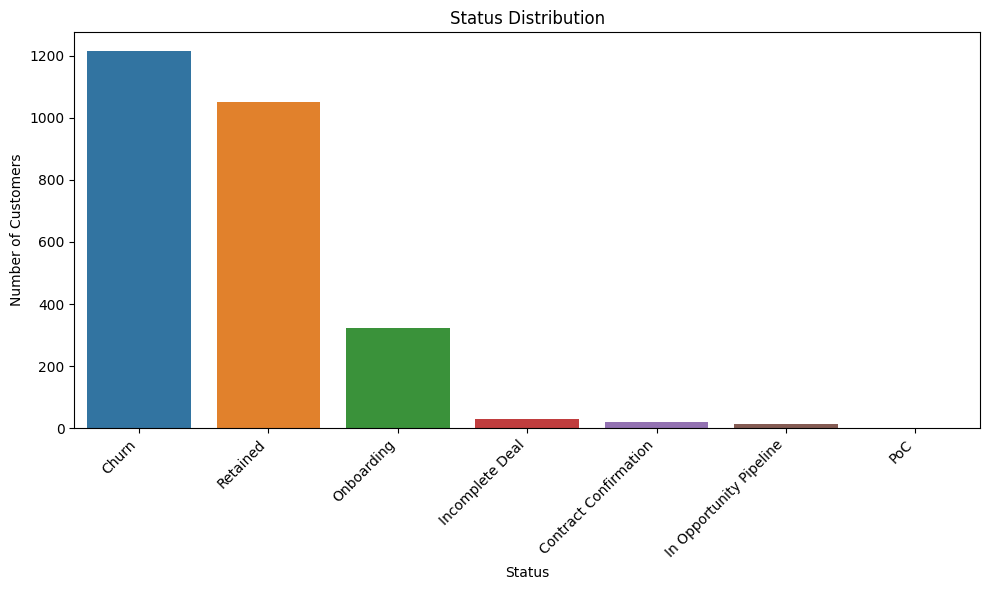

In [1320]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df9, x = 'Status', order = df9['Status'].value_counts().index)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Status Dağılımı:**

* Grafik, "Churn" (Müşteri Kaybı) durumunun en fazla müşteri sayısına sahip olduğunu göstermektedir.

* "Retained" (Elde Tutulan) durumu da yüksek müşteri sayısına sahiptir.

* "Onboarding" (Müşteri Kabulü) durumu orta düzeyde müşteri sayısına sahiptir.

* Diğer durumların müşteri sayıları oldukça düşüktür.

* "PoC" (Proof of Concept - Kavram Kanıtı) durumu en az müşteri sayısına sahiptir.

**Müşteri Sayıları:**

* "Churn" durumunda yaklaşık 1200 müşteri bulunmaktadır.

* "Retained" durumunda yaklaşık 1050 müşteri bulunmaktadır.

* "Onboarding" durumunda yaklaşık 320 müşteri bulunmaktadır.

* Diğer durumlarda müşteri sayıları 50'nin altındadır.

**Genel Eğilim:**

* Grafik, müşteri sayılarının durumlara göre büyük ölçüde değiştiğini göstermektedir.

* "Churn" ve "Retained" durumları müşteri sayısında baskın durumdadır.

* Bu, şirketin müşteri kaybı ve elde tutma konularına odaklanması gerektiğini göstermektedir.

**Çıkarımlar:**

* Şirketin müşteri kaybı oranı yüksektir.

* Şirket, müşteri elde tutma konusunda nispeten başarılıdır.

* "Onboarding" süreci de önemli sayıda müşteriyi kapsamaktadır.

* Diğer durumlar daha az sayıda müşteriyi etkilemektedir.

**Öneriler:**

* Şirket, müşteri kaybı nedenlerini araştırmalı ve bu nedenleri ortadan kaldırmak için stratejiler geliştirmelidir.

* Şirket, müşteri elde tutma stratejilerini güçlendirmelidir.

* Şirket, "Onboarding" sürecini iyileştirmelidir.

* Şirket, diğer durumların nedenlerini araştırmalı ve bu durumları iyileştirmek için stratejiler geliştirmelidir.

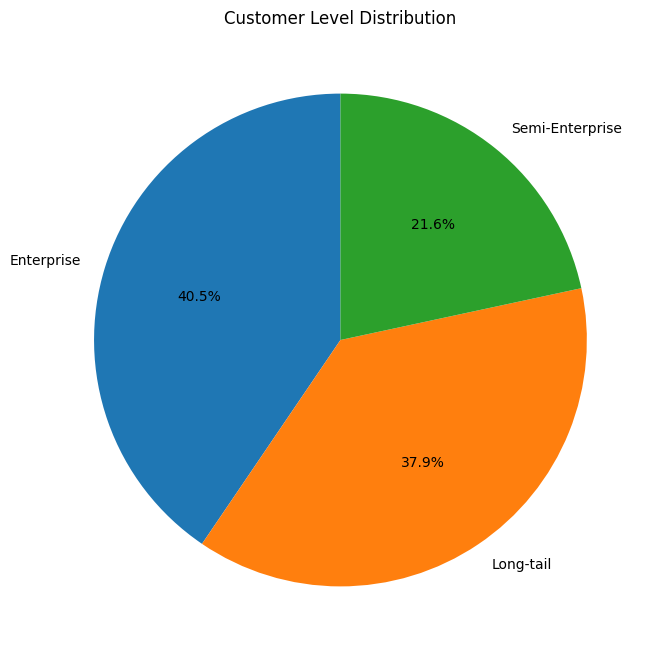

In [1321]:
level_counts = df9['Customer Level'].value_counts()

plt.figure(figsize = (8, 8))
plt.pie(level_counts, labels = level_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Customer Level Distribution')
plt.show()

**Grafik Türü:**

* Bu, pasta grafik (pie chart) olarak adlandırılır. Bir kategorik değişkenin (bu durumda "Customer Level") dağılımını gösterir. Her dilim, bir müşteri seviyesini temsil eder ve dilimin boyutu, o seviyedeki müşterilerin toplam müşterilere oranını gösterir.

**Dilimler ve Yüzdeler:**

* Enterprise: %40.5
* Long-tail: %37.9
* Semi-Enterprise: %21.6

**Grafiğin Yorumu:**

**1.Cutomer Level Dağılımı:**

* Grafik, "Enterprise" (Kurumsal) seviyesindeki müşterilerin en büyük dilimi oluşturduğunu göstermektedir (%40.5).

* "Long-tail" (Uzun Kuyruk) seviyesindeki müşteriler de önemli bir dilim oluşturmaktadır (%37.9).

* "Semi-Enterprise" (Yarı Kurumsal) seviyesindeki müşteriler ise en küçük dilimi oluşturmaktadır (%21.6).

**Müşteri Oranları:**

* "Enterprise" seviyesindeki müşteriler, toplam müşterilerin yaklaşık %40.5'ini oluşturmaktadır.

* "Long-tail" seviyesindeki müşteriler, toplam müşterilerin yaklaşık %37.9'unu oluşturmaktadır.

* "Semi-Enterprise" seviyesindeki müşteriler, toplam müşterilerin yaklaşık %21.6'sını oluşturmaktadır.

**Genel Eğilim:**

* Grafik, müşteri seviyelerinin nispeten dengeli bir dağılım gösterdiğini, ancak "Enterprise" ve "Long-tail" seviyelerinin daha büyük bir paya sahip olduğunu göstermektedir.

* Şirketin hem büyük kurumsal müşterilere hem de daha küçük müşterilere odaklandığı anlaşılmaktadır.

**Çıkarımlar:**

*  Şirketin müşteri portföyünde hem büyük kurumsal müşteriler hem de daha küçük müşteriler önemli bir yer tutmaktadır.

* "Enterprise" ve "Long-tail" seviyeleri, şirketin gelirleri açısından kritik öneme sahip olabilir.

* "Semi-Enterprise" seviyesi, potansiyel büyüme alanı olarak değerlendirilebilir.

**Öneriler:**

* Şirket, "Enterprise" ve "Long-tail" seviyelerindeki müşterilere özel hizmetler ve ürünler sunarak müşteri memnuniyetini artırabilir.

* Şirket, "Semi-Enterprise" seviyesindeki müşterileri "Enterprise" seviyesine yükseltmek için stratejiler geliştirebilir.

* Şirket, farklı müşteri seviyelerindeki müşteri ihtiyaçlarını daha iyi anlamak için pazar araştırması yapabilir.


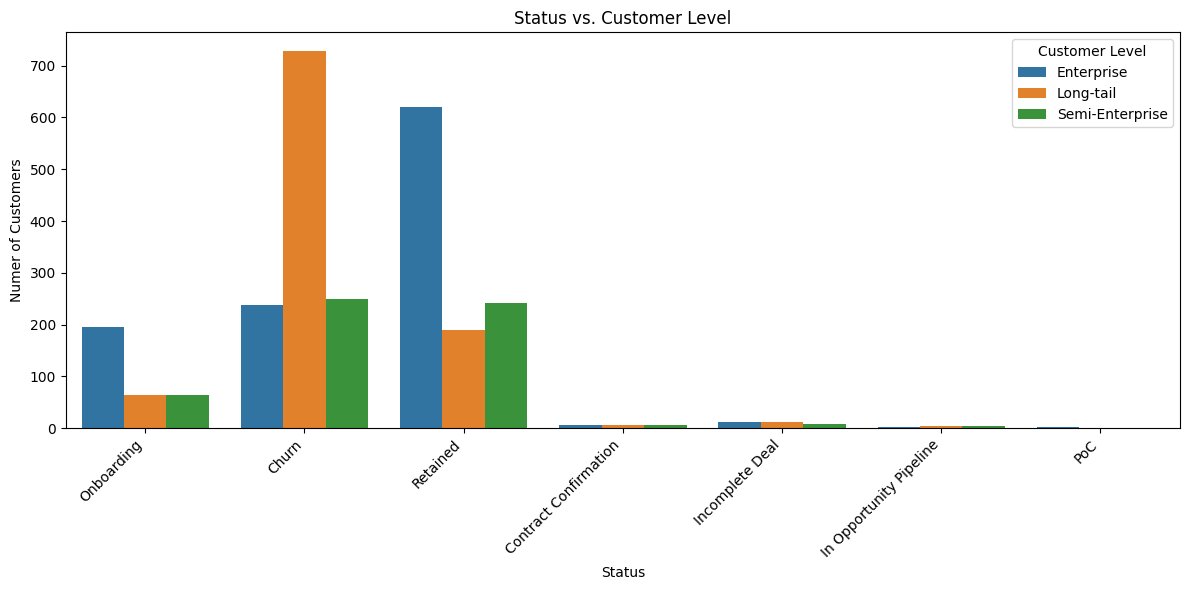

In [1322]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df9, x = 'Status', hue = 'Customer Level')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Status vs. Customer Level')
plt.xlabel('Status')
plt.ylabel('Numer of Customers')
plt.tight_layout()
plt.show()

**Grafik Türü:**

Bu, gruplandırılmış çubuk grafik (grouped bar chart) olarak adlandırılır. İki kategorik değişken arasındaki ilişkiyi gösterir. Bu durumda, "Status" ve "Customer Level" değişkenleri arasındaki ilişkiyi gösterir. Her çubuk, bir durumu temsil eder ve çubuğun farklı renkli bölümleri, o durumdaki farklı müşteri seviyelerinin müşteri sayılarını gösterir.

**Status ve Customer İlişkisi:**

* Grafik, farklı durumlardaki müşteri seviyesi dağılımlarını karşılaştırmamızı sağlar.

* "Churn" (Müşteri Kaybı) durumunda, "Long-tail" (Uzun Kuyruk) seviyesindeki müşterilerin çoğunlukta olduğu görülmektedir.

* "Retained" (Elde Tutulan) durumunda, "Enterprise" (Kurumsal) seviyesindeki müşterilerin çoğunlukta olduğu görülmektedir.

* "Onboarding" (Müşteri Kabulü) durumunda, "Enterprise" ve "Semi-Enterprise" (Yarı Kurumsal) seviyelerindeki müşterilerin benzer sayılarda olduğu görülmektedir.

* Diğer durumlarda müşteri sayıları oldukça düşüktür ve müşteri seviyeleri arasında belirgin bir fark bulunmamaktadır.

**Müşteri Seviyelerinin Dağılımı:**

* "Enterprise" seviyesindeki müşteriler, "Retained" durumunda yoğunlaşmıştır.

* "Long-tail" seviyesindeki müşteriler, "Churn" durumunda yoğunlaşmıştır.

* "Semi-Enterprise" seviyesindeki müşteriler, "Onboarding" ve "Retained" durumlarında nispeten eşit dağılmıştır.

**Genel Eğilim:**

* Grafik, müşteri seviyelerinin durumlara göre farklı dağılımlar gösterdiğini ortaya koymaktadır.

* "Churn" ve "Retained" durumları, müşteri seviyeleri açısından en belirgin farklılıkları göstermektedir.

* "Enterprise" müşterileri elde tutma konusunda daha başarılı iken, "Long-tail" müşterileri müşteri kaybı riski altındadır.

**Çıkarımlar:**

* Şirketin "Enterprise" müşterilerini elde tutma stratejileri başarılıdır.

* Şirket, "Long-tail" müşterilerinin müşteri kaybını önlemek için stratejiler geliştirmelidir.

* "Onboarding" sürecinde, farklı müşteri seviyelerine yönelik farklı yaklaşımlar benimsenmelidir.

* Diğer durumlardaki müşteri sayıları düşük olduğu için, bu durumlar üzerinde daha detaylı bir analiz yapılmasına gerek yoktur.

**Öneriler:**

* Şirket, "Long-tail" müşterilerinin müşteri kaybı nedenlerini araştırmalı ve bu nedenleri ortadan kaldırmak için stratejiler geliştirmelidir.

* Şirket, "Onboarding" sürecini farklı müşteri seviyelerine göre özelleştirmelidir.

* Şirket, "Enterprise" müşterilerinin elde tutma stratejilerini diğer müşteri seviyelerine de uygulamayı düşünebilir.

# **DATAFRAMELERİN "CUSTOMER ID" SÜTUNUYLA BİRLEŞTİRİLMESİ**

In [1323]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
merged_df = dfs[0]

In [1324]:
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on = 'Customer ID', how = 'outer')

merged_df.head(20)

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,Customer Age (Months),MRR,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
1,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,72.0,CEE,Retail,Cosmetics,Retained,Enterprise
2,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,160.0,CEE,Retail,Cosmetics,Retained,Enterprise
3,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,159.0,CEE,Retail,Cosmetics,Retained,Enterprise
4,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
5,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,72.0,CEE,Retail,Cosmetics,Retained,Enterprise
6,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,160.0,CEE,Retail,Cosmetics,Retained,Enterprise
7,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,159.0,CEE,Retail,Cosmetics,Retained,Enterprise
8,CRM-1002400,2022.0,1.0,2022-01-01,2022-03-01,9.0,4.0,1.0,4.0,3.235362,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
9,CRM-1002400,2022.0,1.0,2022-01-01,2022-03-01,9.0,4.0,1.0,4.0,3.235362,0.0,39.0,6716.0,279868.0,55.0,701.0,NaN,72.0,CEE,Retail,Cosmetics,Retained,Enterprise


In [1325]:
summarize_data(merged_df, "MERGED")


MERGED DATASET SUMMARY:
(10572, 23)

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10572 entries, 0 to 10571
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   Customer ID                                                                10556 non-null  object        
 1   Year                                                                       8495 non-null   float64       
 2   Quarter                                                                    8495 non-null   float64       
 3   Survey Date                                                                8495 non-null   datetime64[ns]
 4   Response Date                                                              8495 non-null   datetime64[ns]
 5   How likely are yo

# Missing Valuelar Doldurulmadan Önce Sayısal Valueların Histogram Matrisi

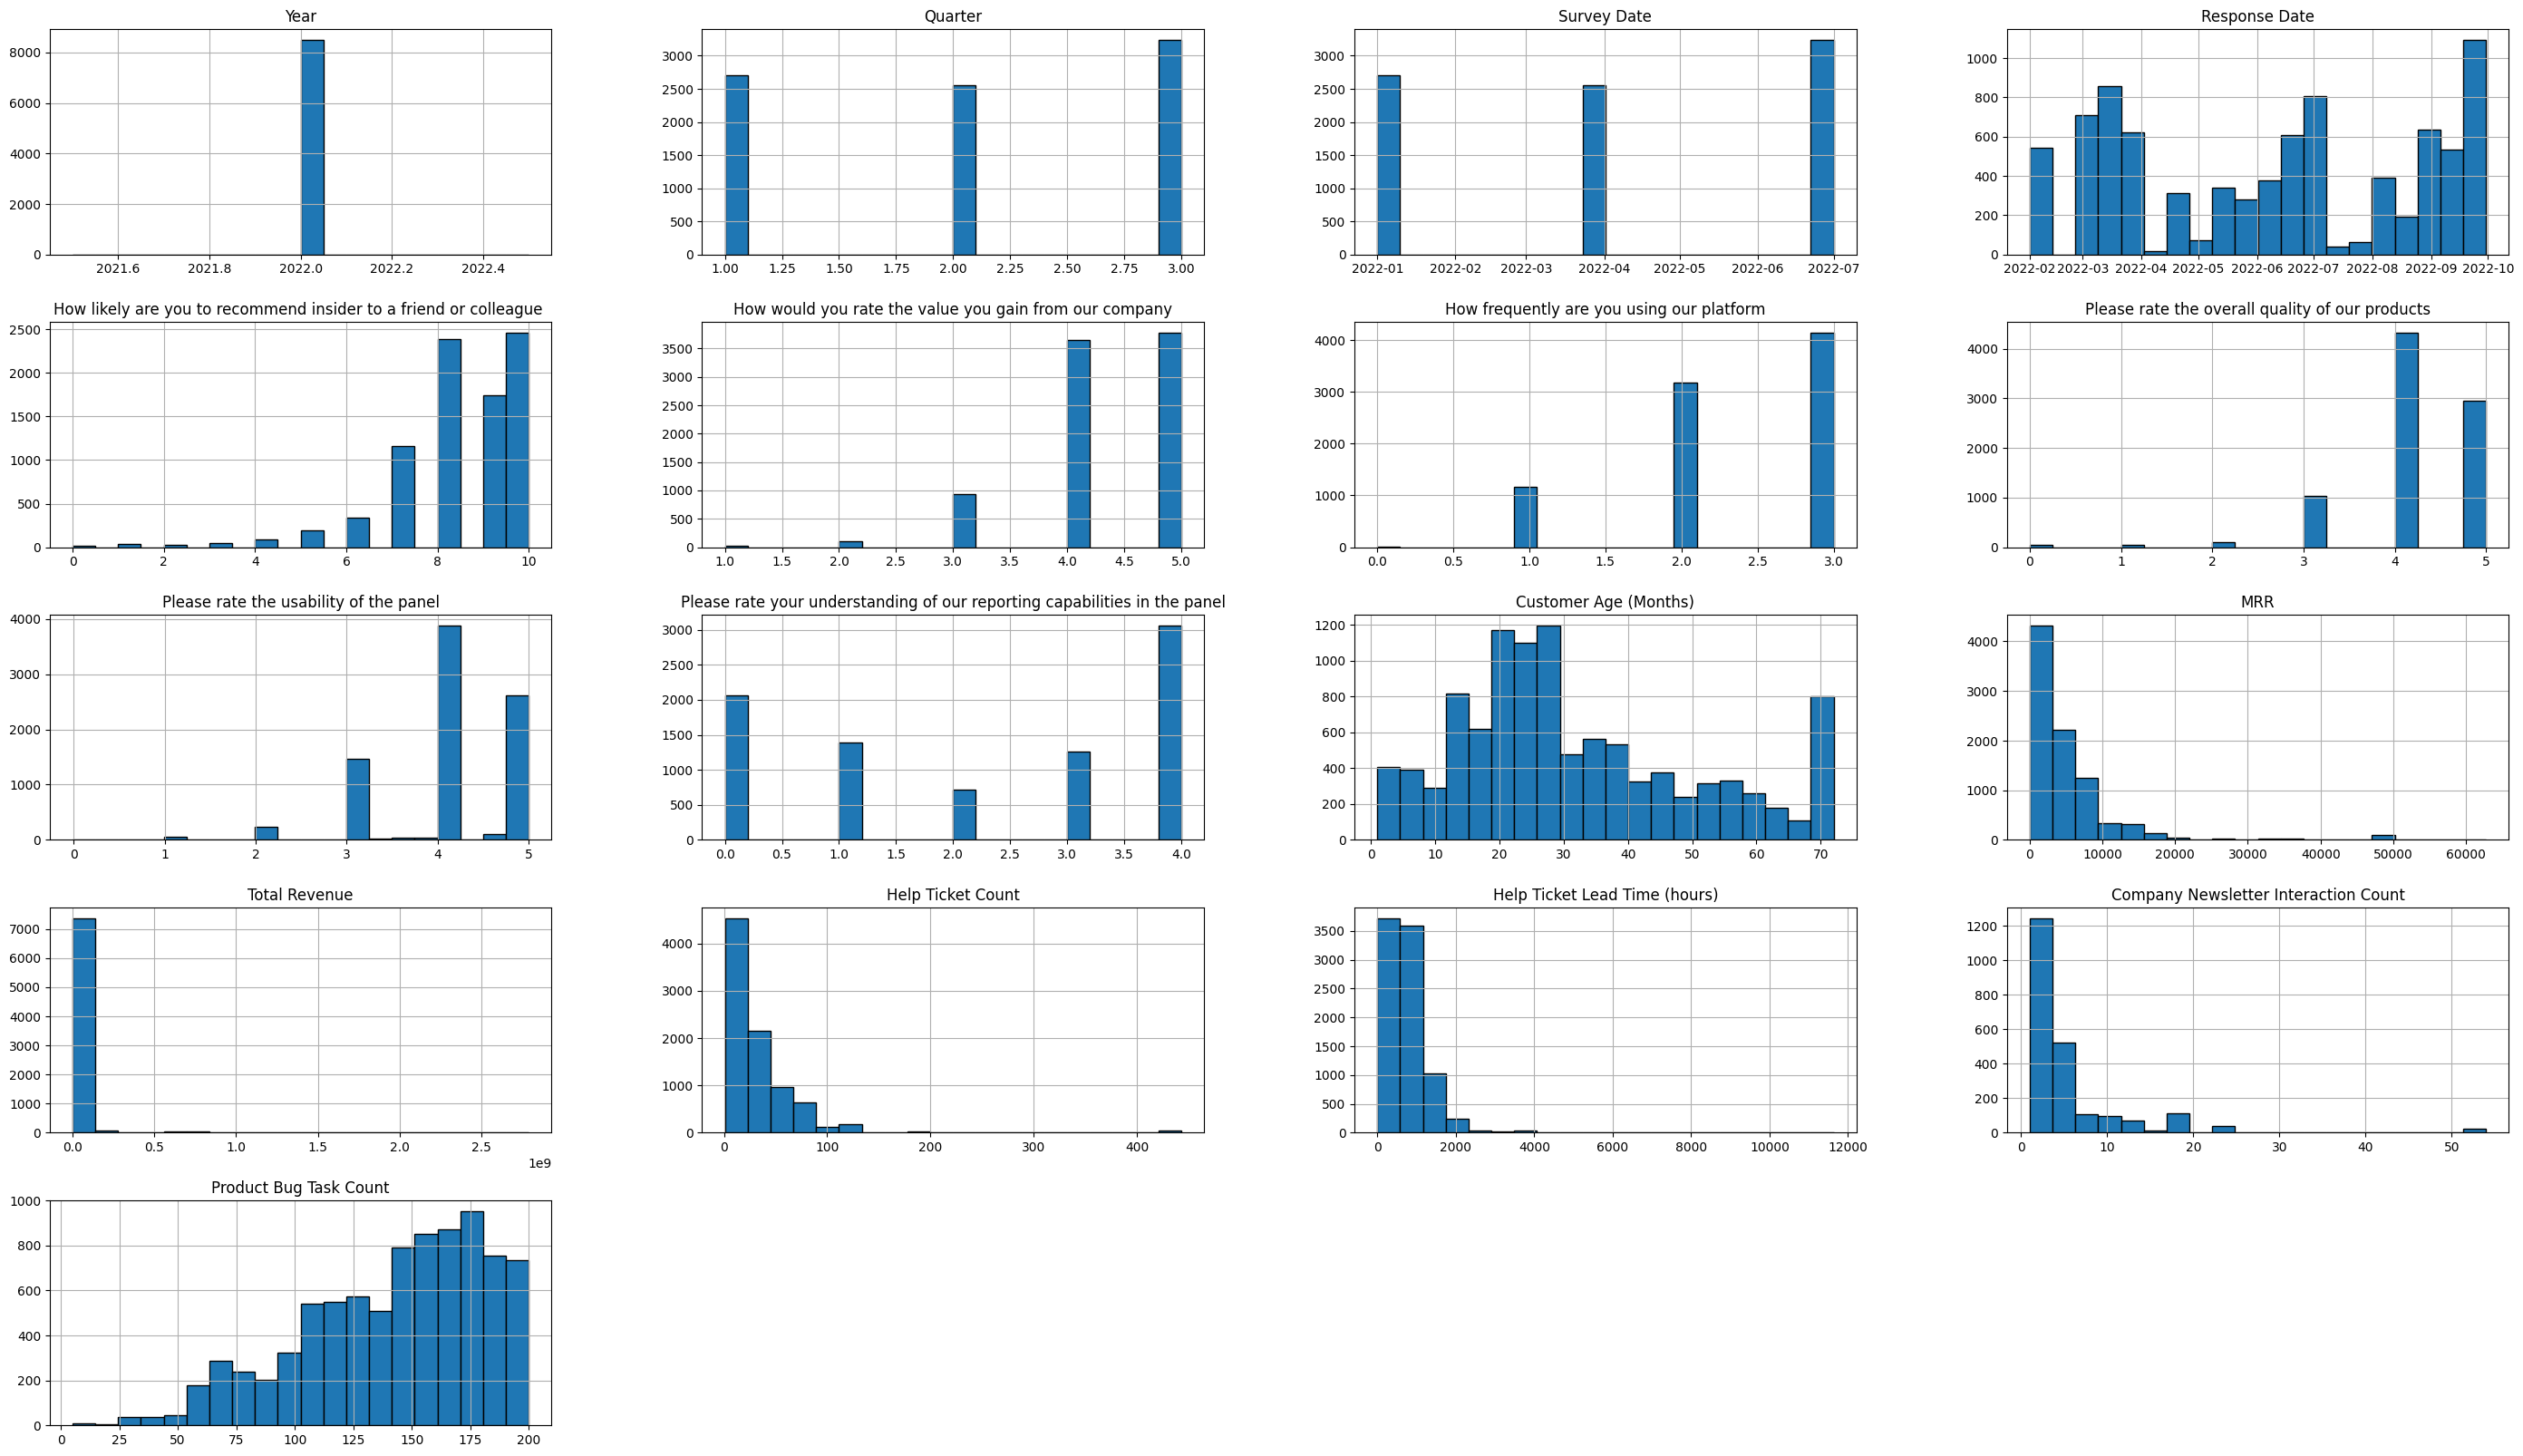

In [1326]:
merged_df.hist(figsize = (35, 20), bins = 20, edgecolor = 'black')
plt.show()

# Sayısal Sütunların Boxplot Grafiği ile Aykırı Değerler Analizi

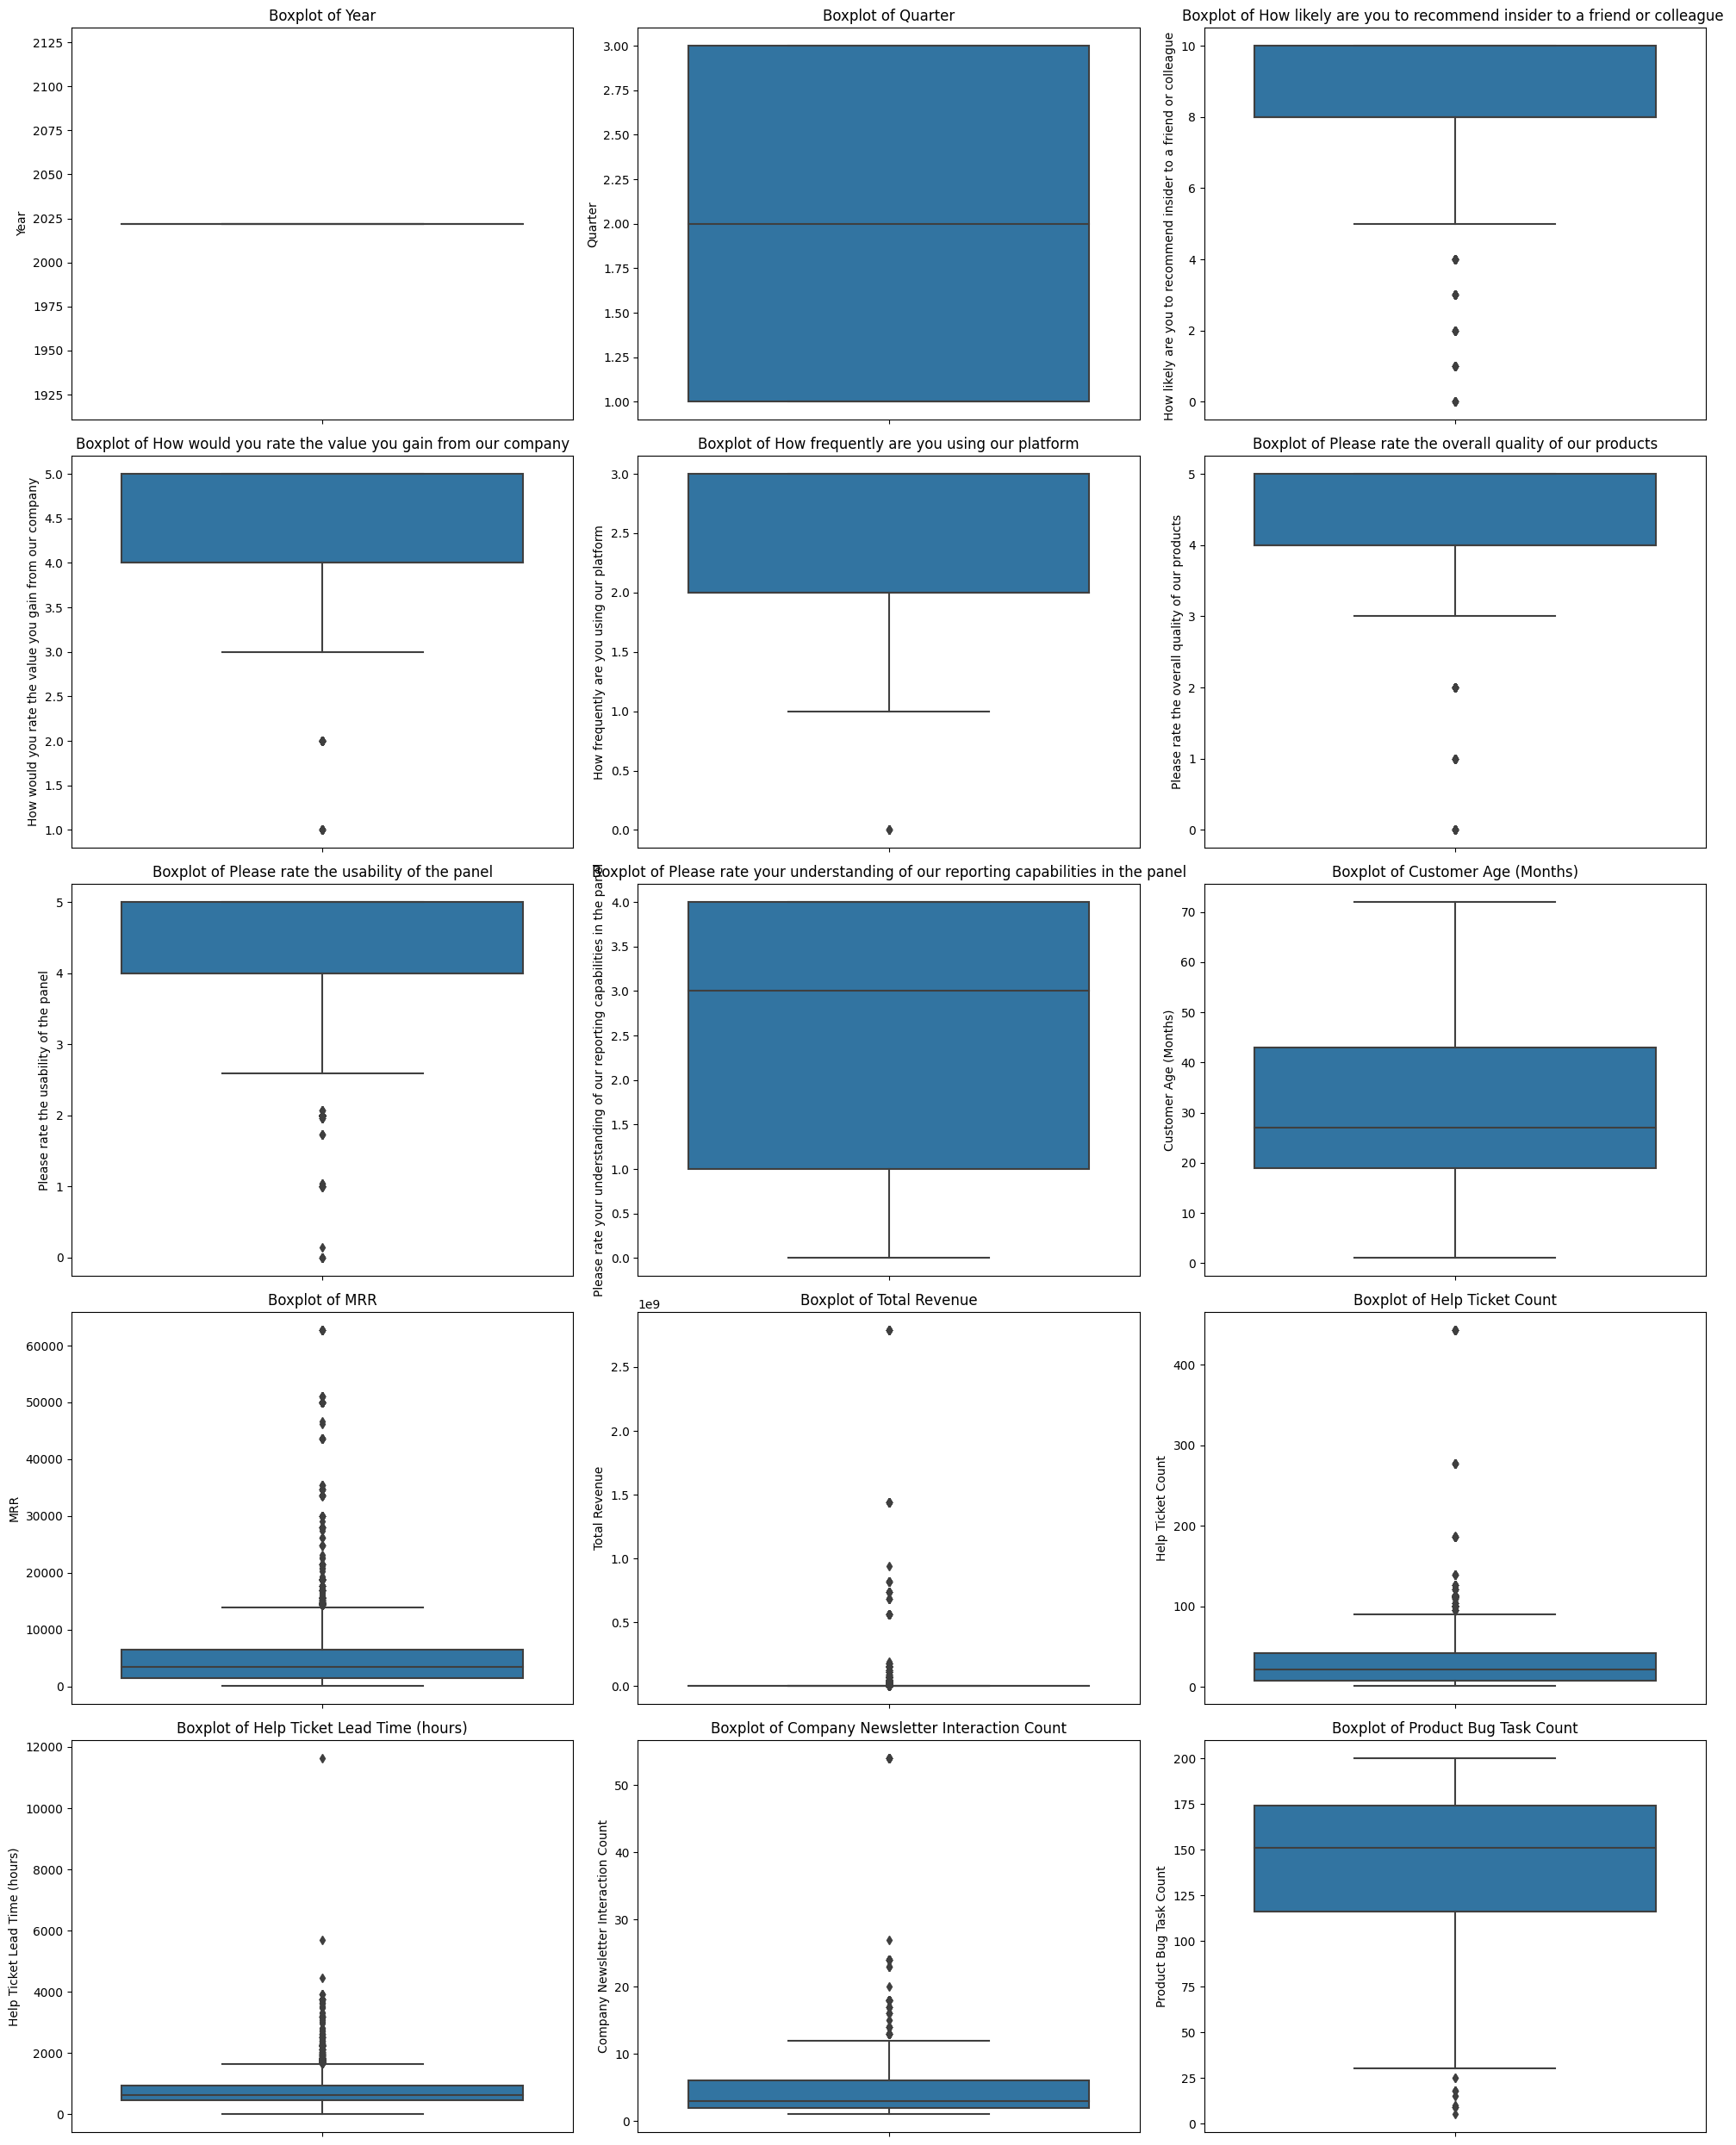

In [1327]:
numeric_cols = merged_df.select_dtypes(include = ['float64']).columns

plt.figure(figsize = (20, 25))

for i, col in enumerate(numeric_cols):
    plt.subplot(5, 3, i + 1)  
    sns.boxplot(y = merged_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout() 
plt.show()

**1.Boxplot of Year Grafiği:**

* Grafikte tek bir değer olduğu için dağılım yoktur. Bu, verilerin tek bir yıla ait olduğunu gösterir.

**2. Boxplot of Quarter Grafiği:**

* Grafikte tek bir değer olduğu için dağılım yoktur. Bu, verilerin tek bir çeyreğe ait olduğunu gösterir.

**3. Boxplot of How likely are you to recommend insider to a friend or colleague Grafiği:**

* Puanlar 4 ve 5'te yoğunlaşmıştır. Bu, katılımcıların ürünü önerme olasılığının yüksek olduğunu gösterir.

* Alt ve üst çeyreklikler arasındaki fark azdır, bu da puanların nispeten tutarlı olduğunu gösterir.

* Aykırı değerler, düşük puan veren az sayıda katılımcıyı temsil edebilir.

**4. Boxplot of How would you rate the value you gain from our company Grafiği:**

* Puanlar 4 ve 5'te yoğunlaşmıştır. Bu, katılımcıların şirketten elde ettikleri değeri yüksek olarak değerlendirdiğini gösterir.

* Alt ve üst çeyreklikler arasındaki fark azdır, bu da puanların nispeten tutarlı olduğunu gösterir.

* Aykırı değerler, düşük puan veren az sayıda katılımcıyı temsil edebilir.

* Boxplot of How frequently are you using our platform Grafiği:**

* Puanlar 4 ve 5'te yoğunlaşmıştır. Bu, katılımcıların platformu sık kullandığını gösterir.

* Alt ve üst çeyreklikler arasındaki fark azdır, bu da puanların nispeten tutarlı olduğunu gösterir.

* Aykırı değerler, düşük puan veren az sayıda katılımcıyı temsil edebilir.

**Boxplot of Please rate the overall quality of our products Grafiği:**

* Puanlar 4 ve 5'te yoğunlaşmıştır. Bu, katılımcıların ürünlerin genel kalitesini yüksek olarak değerlendirdiğini gösterir.

* Alt ve üst çeyreklikler arasındaki fark azdır, bu da puanların nispeten tutarlı olduğunu gösterir.

* Aykırı değerler, düşük puan veren az sayıda katılımcıyı temsil edebilir.

**Boxplot of Please rate the usability of the panel Grafiği:**

* Puanlar 4 ve 5'te yoğunlaşmıştır. Bu, katılımcıların panelin kullanılabilirliğini yüksek olarak değerlendirdiğini gösterir.

* Alt ve üst çeyreklikler arasındaki fark azdır, bu da puanların nispeten tutarlı olduğunu gösterir.

* Aykırı değerler, düşük puan veren az sayıda katılımcıyı temsil edebilir.

**Boxplot of Please rate your understanding of our reporting capabilities in the panel Grafiği:**

* Puanlar 4 ve 5'te yoğunlaşmıştır. Bu, katılımcıların paneldeki raporlama yeteneklerini anlama düzeyini yüksek olarak değerlendirdiğini gösterir.

* Alt ve üst çeyreklikler arasındaki fark azdır, bu da puanların nispeten tutarlı olduğunu gösterir.

* Aykırı değerler, düşük puan veren az sayıda katılımcıyı temsil edebilir.

**Boxplot of Customer Age (Months) Grafiği:**

* Müşteri yaşları geniş bir aralıkta dağılmıştır.

* Medyan, alt ve üst çeyrekliklerin ortasında yer almaktadır.

* Aykırı değerler, çok genç veya çok yaşlı müşterileri temsil edebilir.

**Boxplot of MRR Grafiği:**

* MRR değerleri sağa çarpıktır. Bu, bazı müşterilerin çok yüksek MRR'ye sahip olduğunu, ancak çoğunluğun daha düşük MRR'ye sahip olduğunu gösterir.

* Medyan, alt çeyrekliklere yakındır.

* Aykırı değerler, çok yüksek MRR'ye sahip müşterileri temsil edebilir.

**Boxplot ofTotal Revenue Grafiği:**

* Toplam gelir değerleri sağa çarpıktır. Bu, bazı müşterilerin çok yüksek toplam gelire sahip olduğunu, ancak çoğunluğun daha düşük toplam gelire sahip olduğunu gösterir.

* Medyan, alt çeyrekliklere yakındır.

* Aykırı değerler, çok yüksek toplam gelire sahip müşterileri temsil edebilir.

**Boxplot of Help Ticket Count Grafiği:**

* Yardım bileti sayısı değerleri sağa çarpıktır. Bu, bazı müşterilerin çok sayıda yardım bileti açtığını, ancak çoğunluğun daha az sayıda yardım bileti açtığını gösterir.

* Medyan, alt çeyrekliklere yakındır.

* Aykırı değerler, çok sayıda yardım bileti açan müşterileri temsil edebilir.

**Boxplot of Help Ticket Lead Time (hours) Grafiği:**

* Yardım bileti çözüm süresi değerleri sağa çarpıktır. Bu, bazı yardım biletlerinin çok uzun sürede çözüldüğünü, ancak çoğunluğun daha kısa sürede çözüldüğünü gösterir.

* Medyan, alt çeyrekliklere yakındır.

* Aykırı değerler, çok uzun sürede çözülen yardım biletlerini temsil edebilir.

**Boxplot of Company Newsletter Interaction Count Grafiği:**

* Şirket bülteni etkileşim sayısı değerleri sağa çarpıktır. Bu, bazı müşterilerin şirket bülteniyle çok fazla etkileşimde bulunduğunu, ancak çoğunluğun daha az etkileşimde bulunduğunu gösterir.

* Medyan, alt çeyrekliklere yakındır.

* Aykırı değerler, şirket bülteniyle çok fazla etkileşimde bulunan müşterileri temsil edebilir.

**Boxplot of Product Bug Task Count Grafiği:**

* Ürün hata görevi sayısı değerleri nispeten normal bir dağılım göstermektedir.

* Medyan, alt ve üst çeyrekliklerin ortasında yer almaktadır.

* Aykırı değerler, çok fazla veya çok az sayıda ürün hata görevi olan müşterileri temsil edebilir.

**Genel Çıkarımlar:**

* Katılımcılar, şirketin ürün ve hizmetlerinden genellikle memnun kalmaktadır.

* Şirketin raporlama yetenekleri konusunda iyileştirme yapması gerekmektedir.

* Müşterilerin yaşları ve gelirleri arasında büyük farklılıklar bulunmaktadır.

* Bazı müşteriler, destek talepleri ve bülten etkileşimi gibi konularda diğerlerinden daha aktiftir.

**Öneriler:**

* Şirket, raporlama yeteneklerini geliştirmek için çalışmalar yapmalıdır.
* Şirket, müşteri geri bildirimlerini dikkate alarak ürün ve hizmetlerini iyileştirmelidir.
* Şirket, farklı müşteri segmentlerine yönelik farklı stratejiler geliştirmelidir.

# IQR Yöntemiyle Aykırı Değerleri Tespit Edip Winsorizing Yöntemiyle Sınır Değerlere Çekme

In [1328]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Winsorizing yöntemi
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

numeric_columns = merged_df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_columns:
    merged_df = remove_outliers_iqr(merged_df, col)

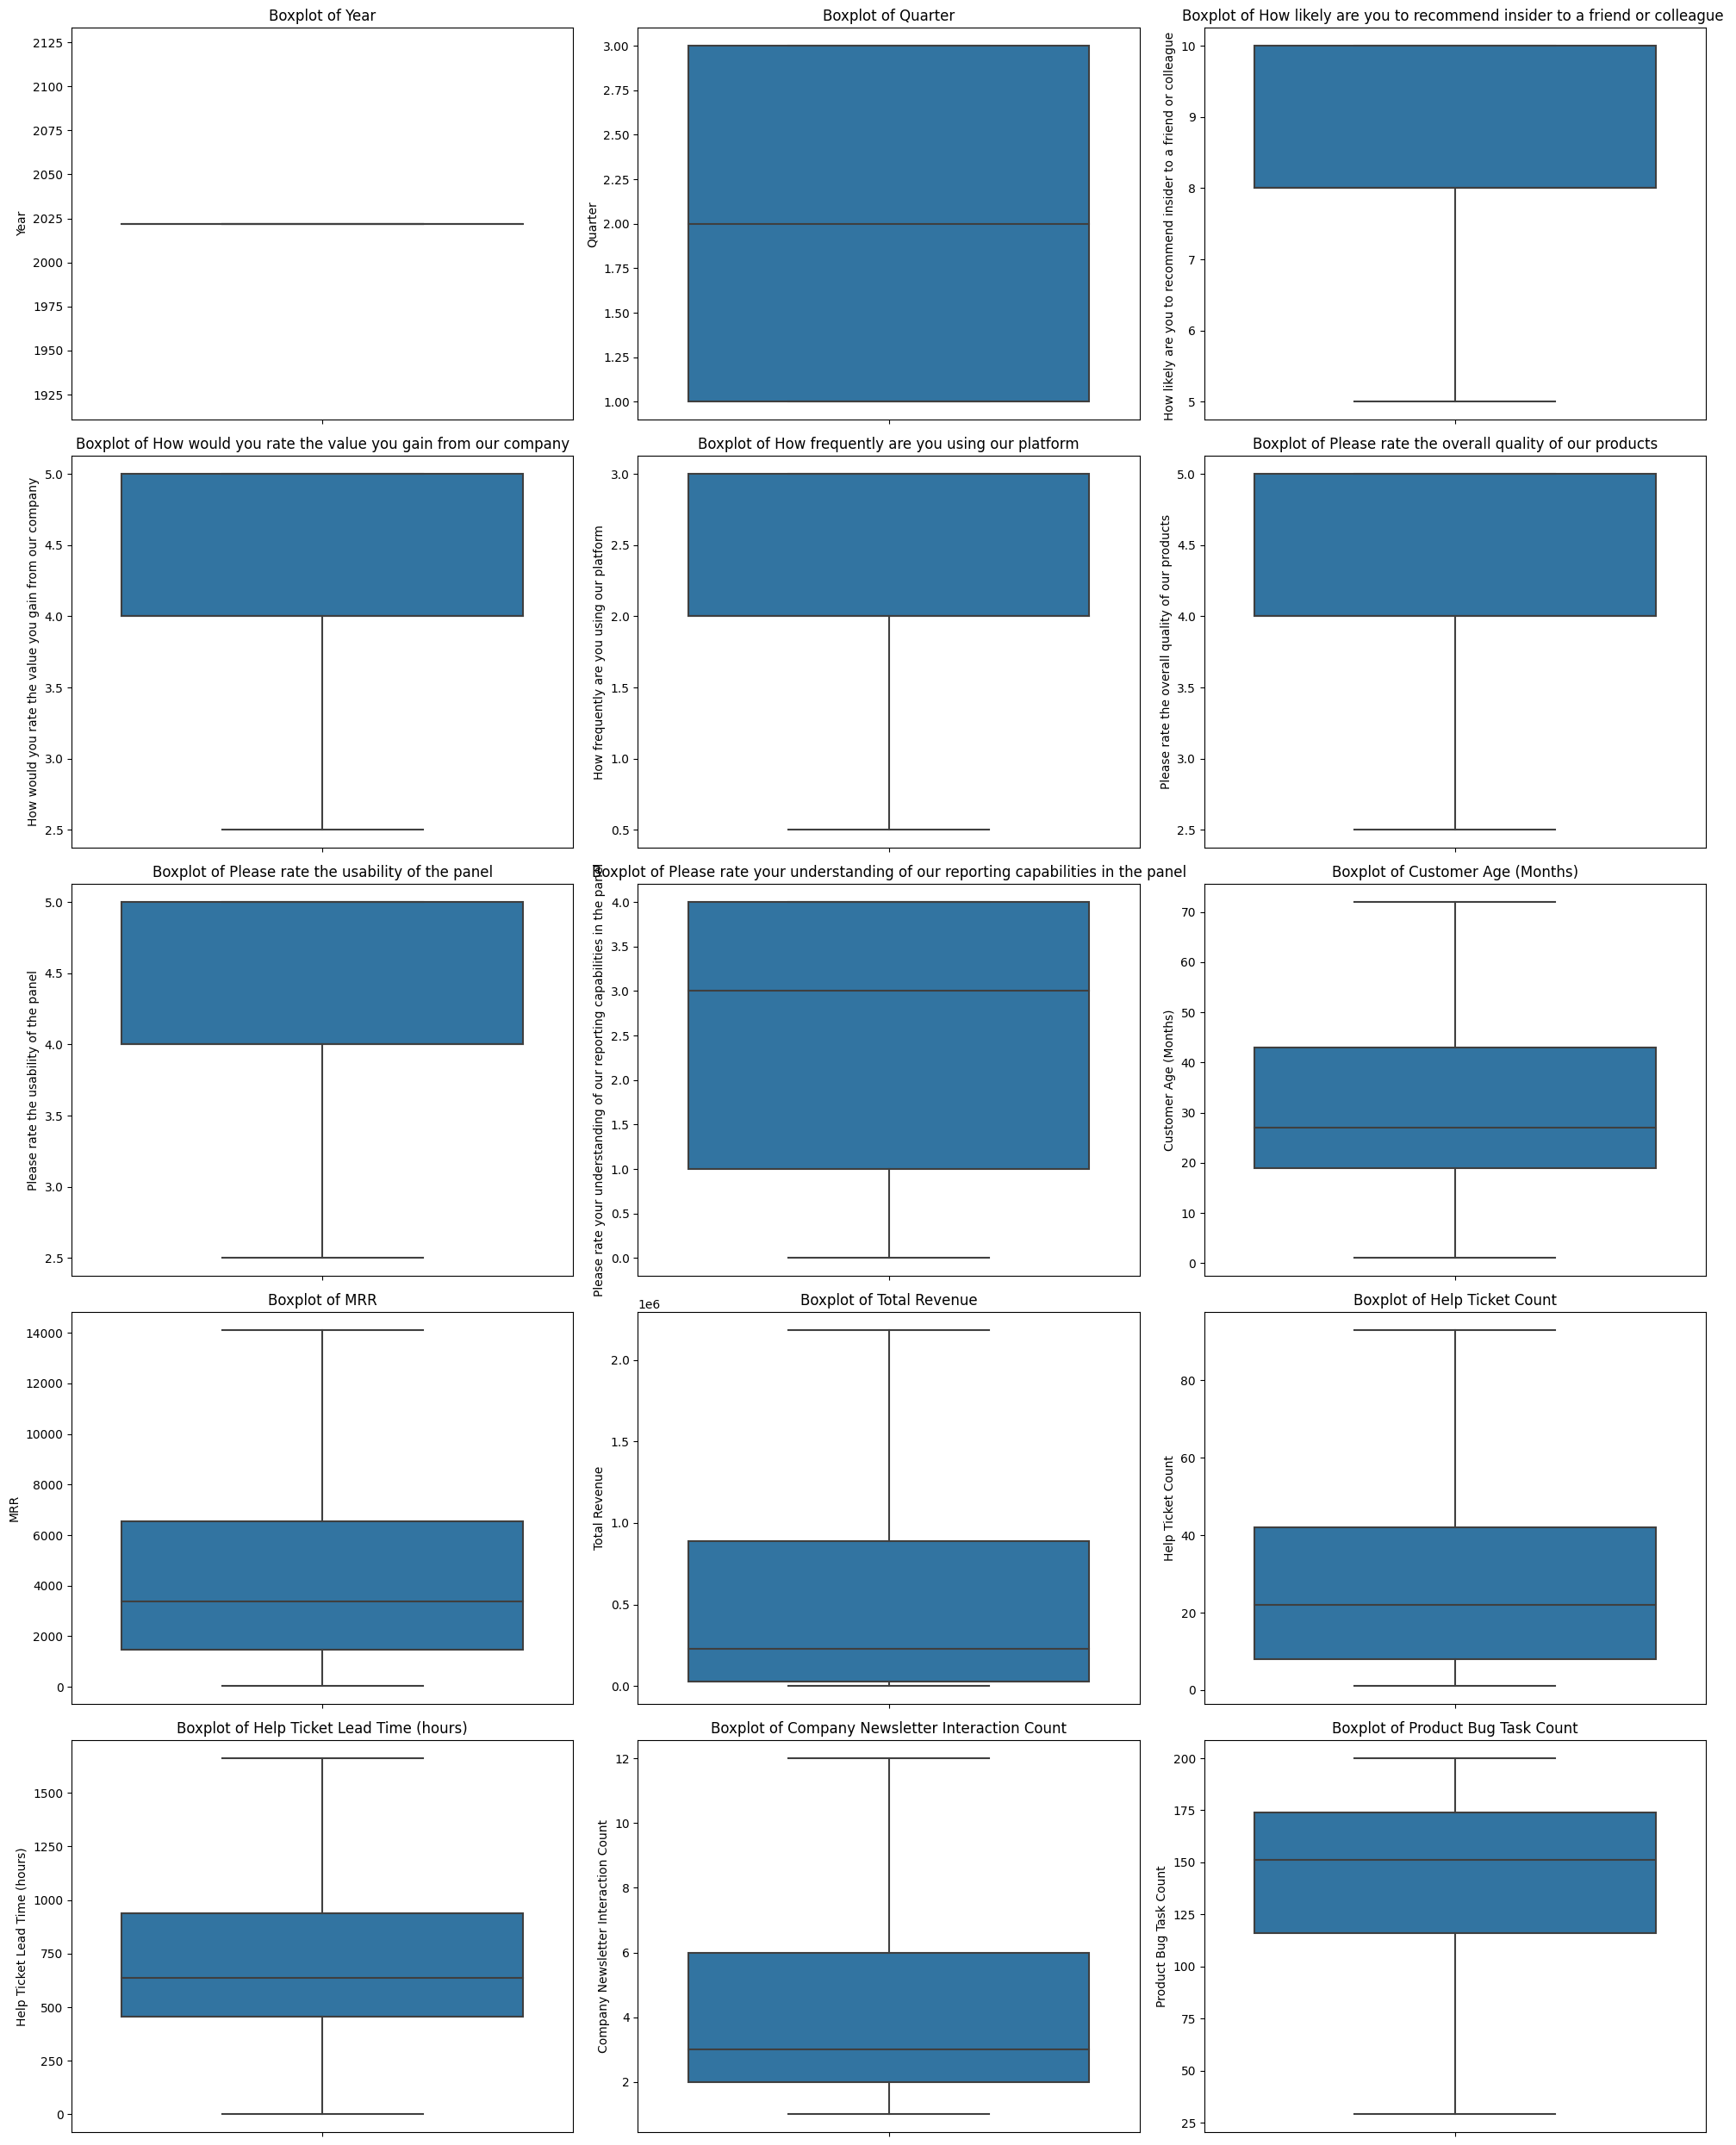

In [1329]:
numeric_cols = merged_df.select_dtypes(include = ['float64']).columns

plt.figure(figsize = (20, 25))

for i, col in enumerate(numeric_cols):
    plt.subplot(5, 3, i + 1)  
    sns.boxplot(y = merged_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout() 
plt.show()

# **MISSING VALUELARIN DOLDURULMASI**

In [1330]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
merged_df['Customer Age (Months)'] = imputer.fit_transform(merged_df[['Customer Age (Months)']])

In [1331]:
merged_df.dropna(subset = ["Customer ID"], inplace = True)

# numeric columns
num_cols = ["Year", "Quarter", "Help Ticket Count", "Help Ticket Lead Time (hours)", "Company Newsletter Interaction Count", "Product Bug Task Count"]
merged_df[num_cols] = merged_df[num_cols].fillna(merged_df[num_cols].median())

# categorical columns
cat_cols = ["Region", "Vertical", "Subvertical", "Status", "Customer Level"]
for col in cat_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

# date columns
date_cols = ["Survey Date", "Response Date"]
for col in date_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

In [1332]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state = 0)
merged_df[['MRR', 'Total Revenue']] = imputer.fit_transform(merged_df[['MRR', 'Total Revenue']])


In [1333]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

target_cols = [
    'How likely are you to recommend insider to a friend or colleague ',
    'How would you rate the value you gain from our company',
    'How frequently are you using our platform',
    'Please rate the overall quality of our products',
    'Please rate the usability of the panel',
    'Please rate your understanding of our reporting capabilities in the panel'
]

predictor_cols = [
    'How likely are you to recommend insider to a friend or colleague ',
    'How would you rate the value you gain from our company',
    'How frequently are you using our platform',
    'Please rate the overall quality of our products',
    'Please rate the usability of the panel',
    'Please rate your understanding of our reporting capabilities in the panel'

]

imputer = SimpleImputer(strategy = "mean")

for target_col in predictor_cols:
    train_data = merged_df.dropna(subset = [target_col])  # Hedef sütunda eksik olmayanları al
    test_data = merged_df[merged_df[target_col].isnull()]  # Eksik olanları tahmin edeceğiz

    if test_data.empty:
        continue

    X_train = train_data[predictor_cols]
    y_train = train_data[target_col]
    X_test = test_data[predictor_cols]

    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    if target_col == 'Please rate your understanding of our reporting capabilities in the panel':
        model = RandomForestClassifier(random_state=35)
    else:
        model = RandomForestRegressor(random_state=35)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    merged_df.loc[merged_df[target_col].isnull(), target_col] = y_pred


In [1334]:
merged_df.head(20)

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,Customer Age (Months),MRR,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
1,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,72.0,CEE,Retail,Cosmetics,Retained,Enterprise
2,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,160.0,CEE,Retail,Cosmetics,Retained,Enterprise
3,CRM-1002400,2022.0,2.0,2022-04-01,2022-06-10,8.0,4.0,1.0,4.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,159.0,CEE,Retail,Cosmetics,Retained,Enterprise
4,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
5,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,72.0,CEE,Retail,Cosmetics,Retained,Enterprise
6,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,160.0,CEE,Retail,Cosmetics,Retained,Enterprise
7,CRM-1002400,2022.0,3.0,2022-07-01,2022-09-29,10.0,4.0,1.0,3.0,3.000000,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,159.0,CEE,Retail,Cosmetics,Retained,Enterprise
8,CRM-1002400,2022.0,1.0,2022-01-01,2022-03-01,9.0,4.0,1.0,4.0,3.235362,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
9,CRM-1002400,2022.0,1.0,2022-01-01,2022-03-01,9.0,4.0,1.0,4.0,3.235362,0.0,39.0,6716.000000,2.798680e+05,55.0,701.0,3.0,72.0,CEE,Retail,Cosmetics,Retained,Enterprise


In [1335]:
merged_df.isnull().sum()

Customer ID                                                                  0
Year                                                                         0
Quarter                                                                      0
Survey Date                                                                  0
Response Date                                                                0
How likely are you to recommend insider to a friend or colleague             0
How would you rate the value you gain from our company                       0
How frequently are you using our platform                                    0
Please rate the overall quality of our products                              0
Please rate the usability of the panel                                       0
Please rate your understanding of our reporting capabilities in the panel    0
Customer Age (Months)                                                        0
MRR                                                 

# Missing Valuelar Doldurulmadan Önce Sayısal Valueların Histogram Matrisi

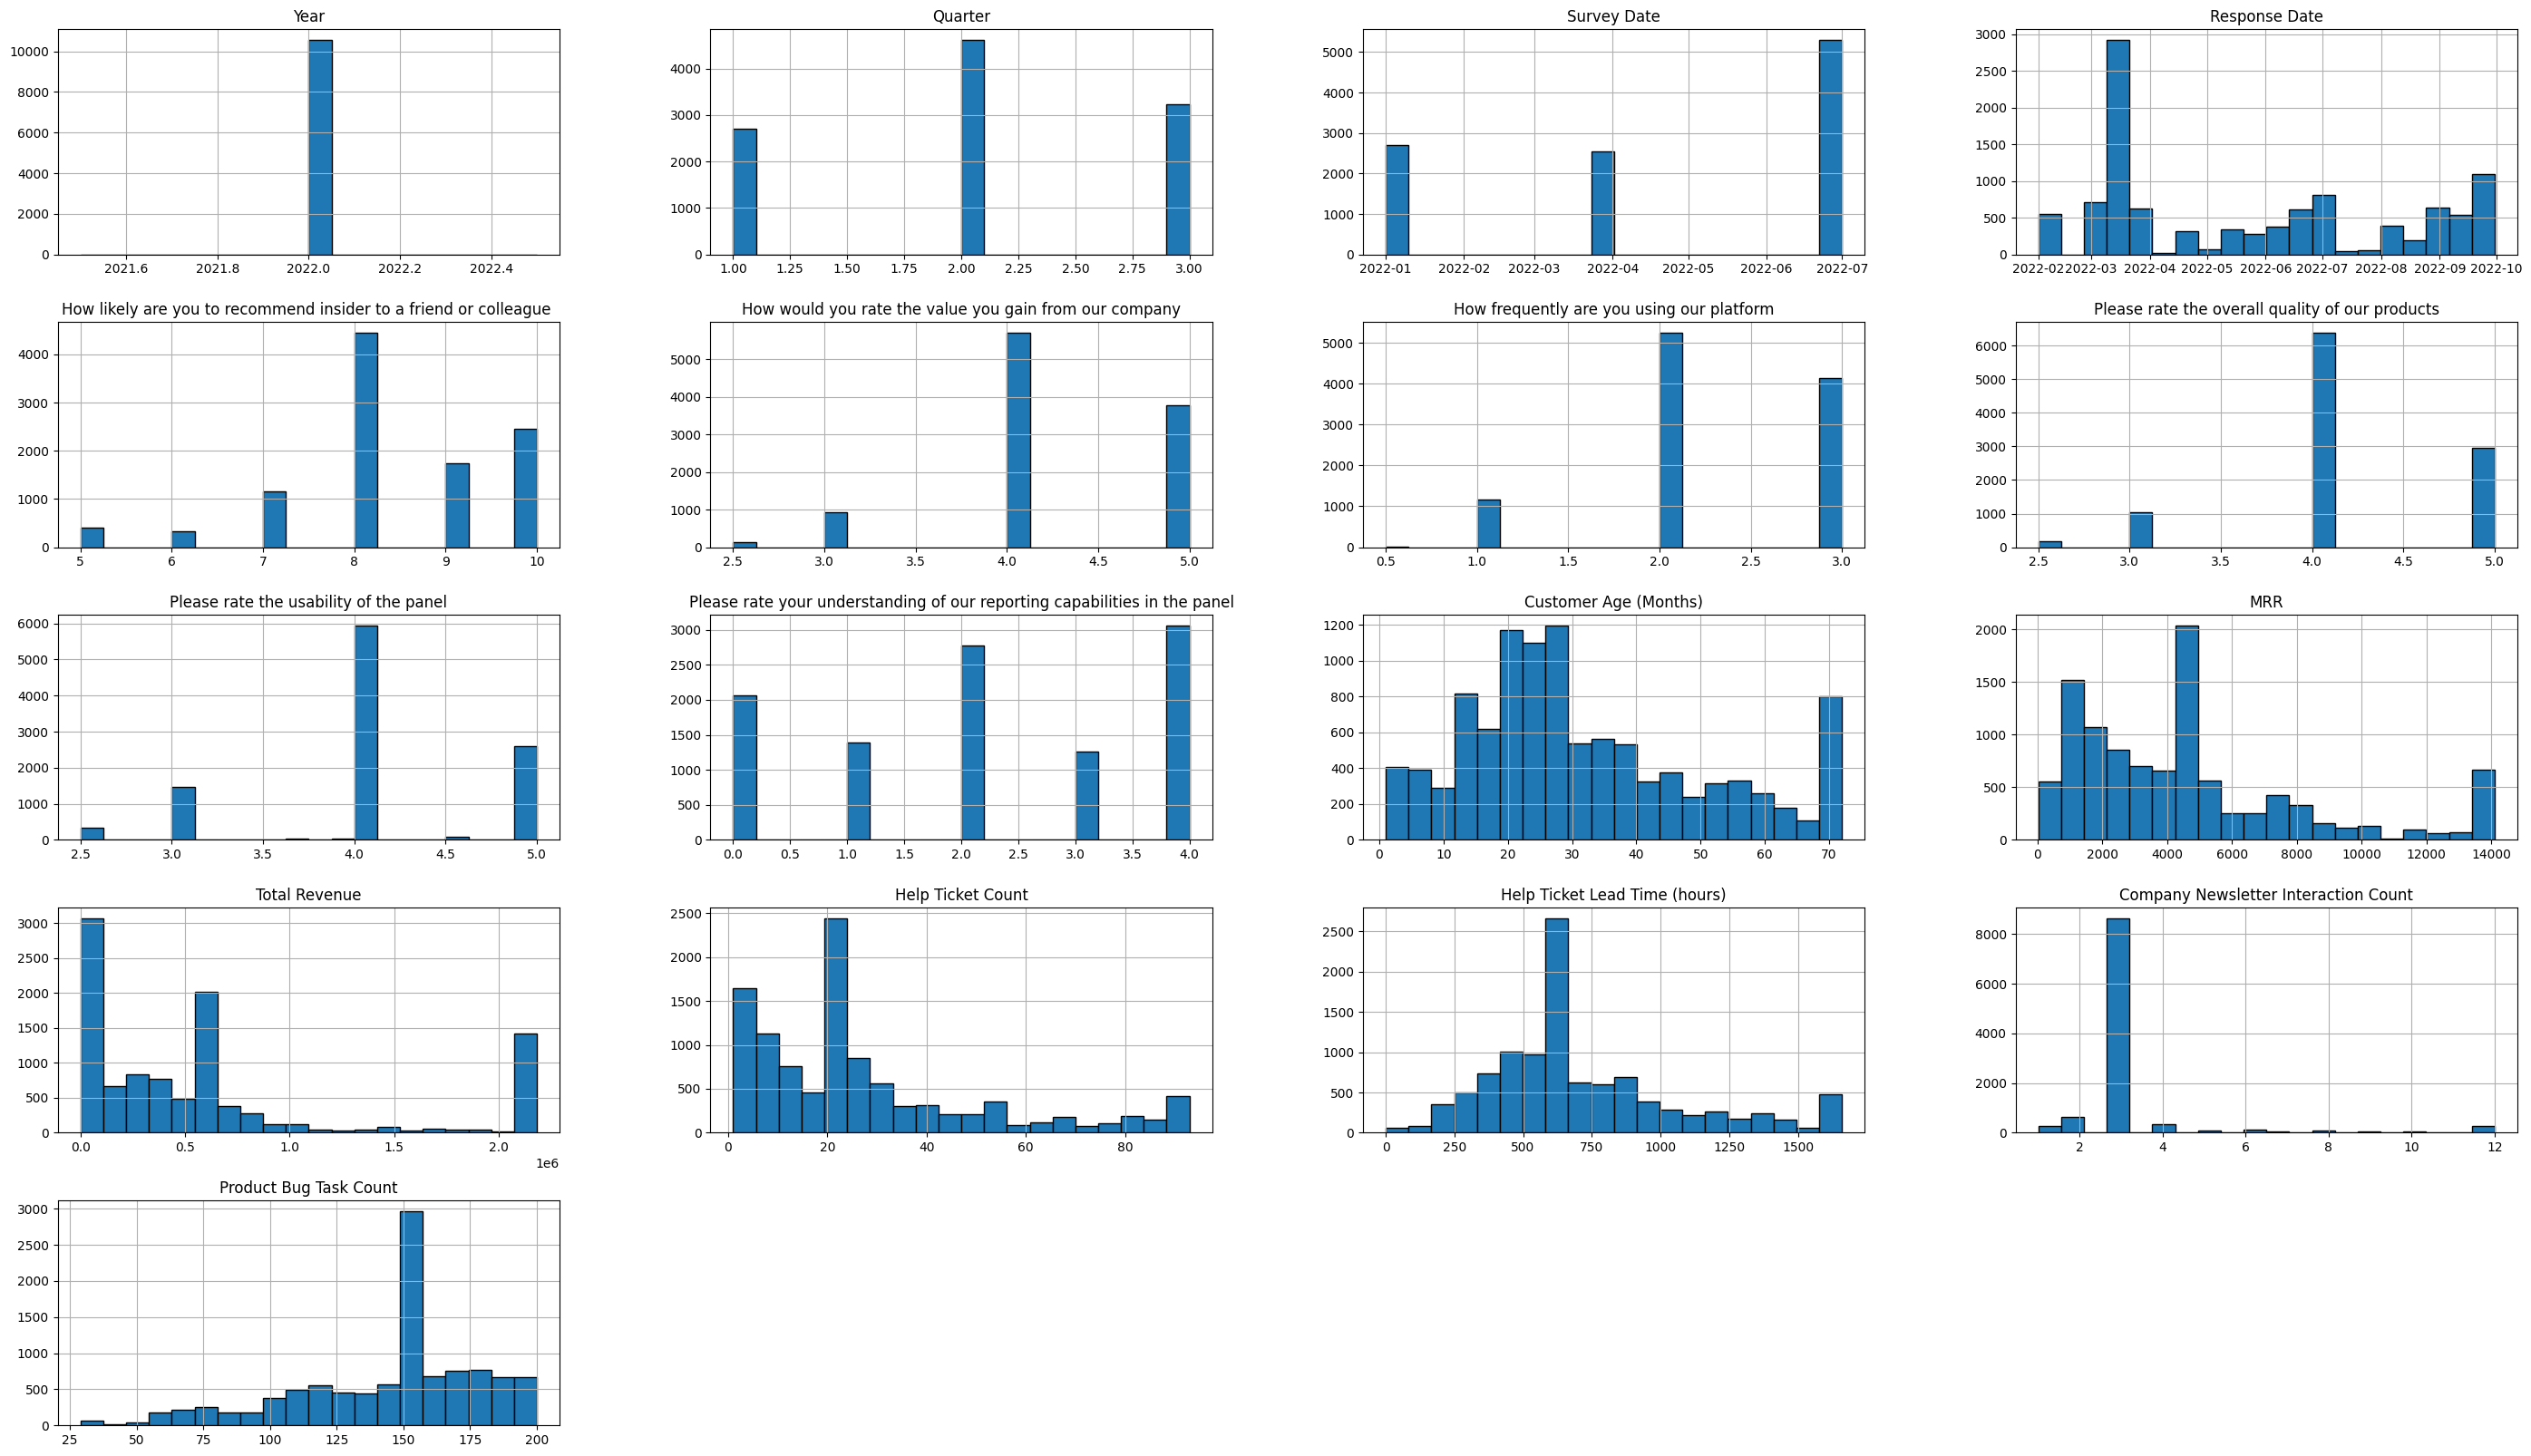

In [1336]:
merged_df.hist(figsize = (35, 20), bins = 20, edgecolor = 'black')
plt.show()

# **SAYISAL SÜTUNLARIN ARASINDAKİ KORELASYON**

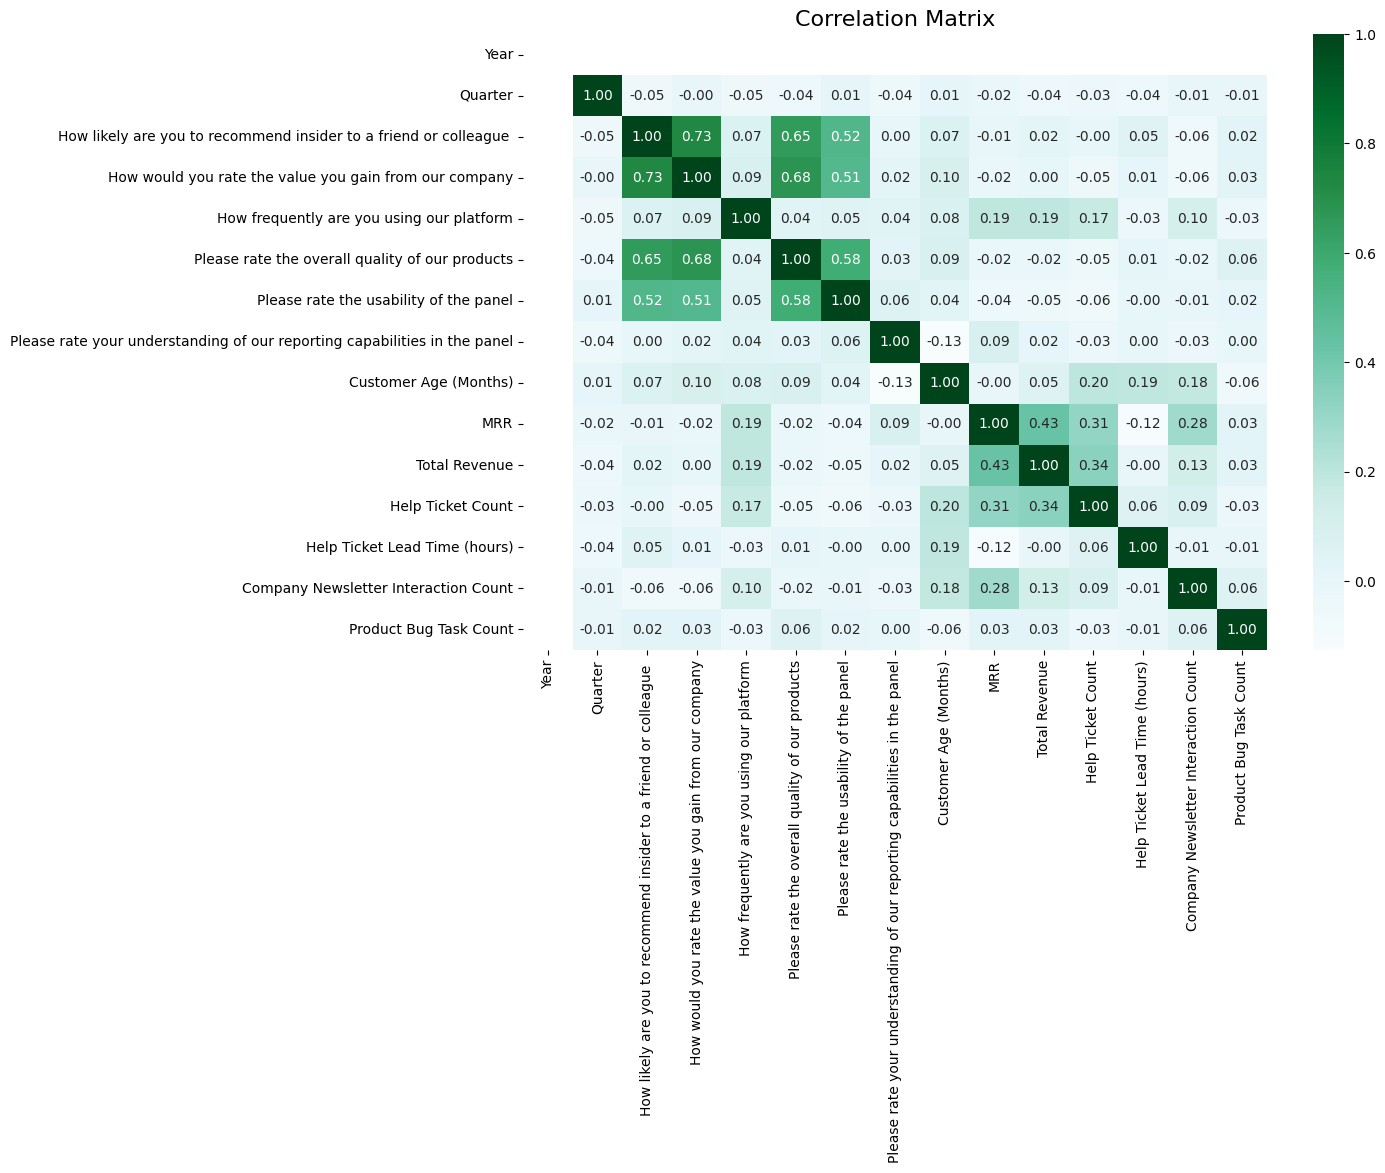

In [1337]:
plt.figure(figsize = (12, 8))  
correlation_matrix = merged_df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True, cmap = 'BuGn', fmt = '.2f')
plt.title('Correlation Matrix', fontsize = 16)  
plt.show()


**Korelasyon Matrisinin Yapısı**

* Her bir hücre, iki değişken arasındaki korelasyon katsayısını gösterir.

* Pozitif korelasyonlar (0 ile 1 arasında) → Bir değişken arttığında diğeri de artar.

* Negatif korelasyonlar (-1 ile 0 arasında) → Bir değişken arttığında diğeri azalır.

* Korelasyon katsayısının mutlak değeri:
0.00-0.19 → Çok zayıf korelasyon
0.20-0.39 → Zayıf korelasyon
0.40-0.59 → Orta düzeyde korelasyon
0.60-0.79 → Güçlü korelasyon
0.80-1.00 → Çok güçlü korelasyon


**Genel Değerlendirme:**

**1. Güçlü Pozitif Korelasyonlar:**

* "How likely are you to recommend insider to a friend or colleague", "How would you rate the value you gain from our company", "Please rate the overall quality of our products", ve "Please rate the usability of the panel" değişkenleri arasında güçlü pozitif korelasyonlar var. Bu, müşterilerin bu alanlardaki memnuniyetlerinin birbiriyle son derece bağlantılı olduğunu gösterir. Bir alanda memnuniyet arttıkça, diğer alanlarda da artma eğilimi gösteriyor.

* "MRR" ve "Total Revenue" arasında çok güçlü pozitif korelasyon var, bu da beklendiği gibi, daha yüksek aylık gelirin daha yüksek toplam gelirle ilişkili olduğunu gösteriyor.

**2. Orta Düzey Pozitif Korelasyonlar:**

"Help Ticket Count" ve "MRR/Total Revenue" arasında zayıf pozitif korelasyonlar var. Bu, yüksek gelirli müşterilerin daha fazla destek talebinde bulunma eğiliminde olduğunu göstermiyor.

* "Customer Age (Months)" değişkeni, "Help Ticket Count" ve "Company Newsletter Interaction Count" ile zayıf pozitif korelasyonlar gösteriyor. Bu, yaşlı müşterilerin daha fazla destek talebinde bulunma ve bültenlerle daha fazla etkileşimde bulunma olasılığının daha yüksek olduğunu göstermiyor.

**3. Zayıf veya Yok Denecek Kadar Az Korelasyonlar:**

* "Year" ve "Quarter" değişkenleri, diğer değişkenlerle çok zayıf korelasyonlar gösteriyor. Bu, zamanın (yıl veya çeyrek) müşteri memnuniyeti veya gelirle doğrudan bir ilişkisi olmadığını gösteriyor.

* "Help Ticket Lead Time (hours)" ve "Product Bug Task Count" değişkenleri de diğer değişkenlerle zayıf korelasyonlar gösteriyor. Bu, destek biletlerinin çözüm süresinin veya ürün hatalarının diğer faktörlerle güçlü bir şekilde ilişkili olmadığını gösteriyor.

* "Please rate your understanding of our reporting capabilities in the panel" değişkeni, diğer Likert ölçeği değişkenleri ile diğerlerine göre daha zayıf bir ilişkiye sahip. Bu, raporlama yeteneklerinin anlaşılmasının diğer memnuniyet alanlarından biraz farklı olduğunu gösterebilir. Bu durum raporlama sisteminin daha karmaşık, veya anlaşılması zor olduğunu gösterebilir.

**Stratejik Öneriler**

* Müşterilere daha fazla değer sunan özellikler eklenmeli. Ürün kalitesi artırılmalı. Kullanıcı deneyimi iyileştirilmeli.
  
* Mevcut müşterilerden daha fazla gelir elde etmek için ek hizmetler sunulabilir.

* Destek ekibi büyüyen müşteri tabanına uyum sağlayacak şekilde ölçeklenmeli.

* Eğitim içerikleri artırılarak müşteri desteği üzerindeki yük azaltılabilir.

* Hata yönetimi süreçleri iyileştirilmeli.


# **DATALAR HAKKKINDA SORULAR SORMA**

# 1) En yüksek MRR’a sahip müşteri profili nedir?

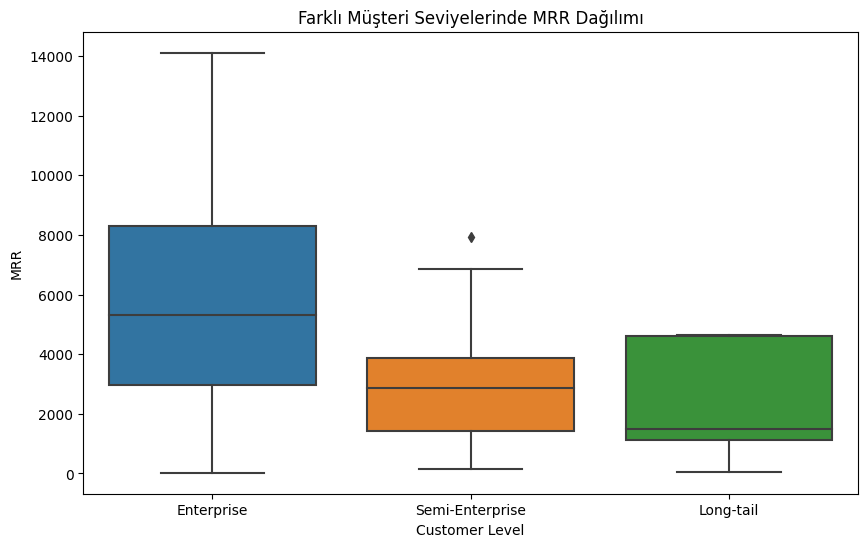

In [1338]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = merged_df['Customer Level'], y = merged_df['MRR'])
plt.title("Farklı Müşteri Seviyelerinde MRR Dağılımı")
plt.xlabel("Customer Level")
plt.ylabel("MRR")
plt.show()

**Genel Dağılım:**

* "Enterprise" (Kurumsal) müşteri seviyesi, en geniş MRR dağılımına sahiptir ve en yüksek medyan MRR değerine sahiptir.

* "Semi-Enterprise" (Yarı Kurumsal) ve "Long-tail" (Uzun Kuyruk) müşteri seviyeleri, daha dar MRR dağılımlarına sahiptir ve daha düşük medyan MRR değerlerine sahiptir.

**Medyan Değerler:**

* "Enterprise" seviyesindeki müşterilerin medyan MRR'si, diğer iki seviyeye göre önemli ölçüde yüksektir.

* "Semi-Enterprise" ve "Long-tail" seviyelerindeki müşterilerin medyan MRR'leri birbirine yakındır.

**Aykırı Değerler:**

* "Enterprise" seviyesinde, yüksek MRR değerlerine sahip çok sayıda aykırı değer bulunmaktadır. Bu, bazı kurumsal müşterilerin çok yüksek gelir getirdiğini göstermektedir.

* "Semi-Enterprise" ve "Long-tail" seviyelerinde daha az sayıda aykırı değer bulunmaktadır.

**Çeyreklikler ve Dağılım:**

* "Enterprise" seviyesindeki müşterilerin MRR dağılımı, diğer iki seviyeye göre daha geniştir. Bu, kurumsal müşteriler arasında gelir farklılıklarının daha fazla olduğunu göstermektedir.
  
* "Semi-Enterprise" ve "Long-tail" seviyelerindeki müşterilerin MRR dağılımları daha dardır. Bu, bu seviyelerdeki müşterilerin gelirlerinin daha homojen olduğunu göstermektedir.

  
**Çıkarımlar:**

* "Enterprise" seviyesindeki müşteriler, şirketin en yüksek gelir getiren müşteri segmentidir.

* "Semi-Enterprise" ve "Long-tail" seviyelerindeki müşteriler, daha düşük ve daha homojen gelir getirmektedir.

* "Enterprise" seviyesindeki müşteriler arasında gelir farklılıkları daha fazladır.

**Öneriler:**

* Şirket, "Enterprise" seviyesindeki müşterilere odaklanarak gelirini artırabilir.

* Şirket, "Semi-Enterprise" ve "Long-tail" seviyelerindeki müşterilerin gelirlerini artırmak için stratejiler geliştirebilir.

* Şirket, "Enterprise" seviyesindeki müşteriler arasındaki gelir farklılıklarının nedenlerini araştırmalıdır.

# 2) Destek talebi fazla olan müşteriler memnuniyetsiz mi?

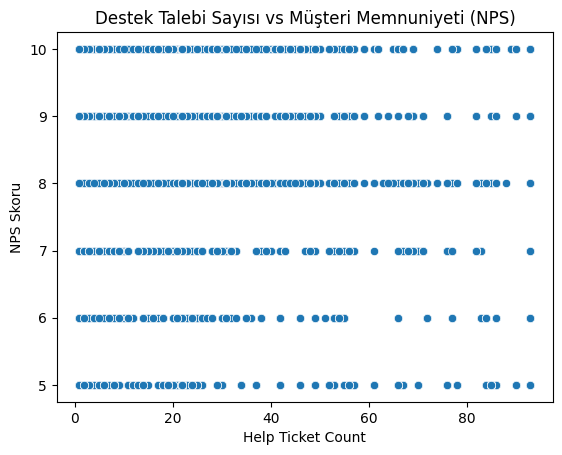

In [1339]:
sns.scatterplot(x = merged_df["Help Ticket Count"], y = merged_df["How likely are you to recommend insider to a friend or colleague "])
plt.title("Destek Talebi Sayısı vs Müşteri Memnuniyeti (NPS)")
plt.xlabel("Help Ticket Count")
plt.ylabel("NPS Skoru")
plt.show()

**Grafik Türü:**

* Bu, saçılım grafiği (scatter plot) olarak adlandırılır. İki sayısal değişken arasındaki ilişkiyi görselleştirmek için kullanılır. Bu durumda, "Destek Talebi Sayısı" (Help Ticket Count) ve "Müşteri Memnuniyeti (NPS)" (Net Promoter Score) değişkenleri arasındaki ilişkiyi göstermektedir.

**Eksenler:**

* **X Ekseni (Yatay):** "Destek Talebi Sayısı" (Help Ticket Count)
* **Y Ekseni (Dikey):** "NPS Skoru" (Net Promoter Score)

**Grafiğin Yorumu:**

**1. Genel Eğilim:**

* Grafikte, "Destek Talebi Sayısı" arttıkça "NPS Skoru"nda belirgin bir düşüş veya artış gözlemlenmemektedir.

* Veri noktaları, grafikte rastgele dağılmıştır. Bu, "Destek Talebi Sayısı" ile "NPS Skoru" arasında güçlü bir doğrusal ilişki olmadığını göstermektedir.

**2. Veri Noktalarının Dağılımı:**

* "NPS Skoru" değerleri, 5 ile 10 arasında dağılmıştır.
* 
* "Destek Talebi Sayısı" değerleri, 0 ile 90 arasında dağılmıştır.

* "Destek Talebi Sayısı" 0 ile 20 arasında yoğunlaşmıştır.

**Aykırı Değerler:**

* Grafikte, "Destek Talebi Sayısı" yüksek (80 civarında) ve "NPS Skoru" düşük (6) olan birkaç aykırı değer bulunmaktadır.

* Bu aykırı değerler, veri setinin genel eğilimini etkileyebilir ve analiz sonuçlarını çarpıtabilir.

**Çıkarımlar:**

* "Destek Talebi Sayısı" ile "NPS Skoru" arasında güçlü bir doğrusal ilişki bulunmamaktadır.

* Müşteri memnuniyeti, destek talebi sayısından bağımsız olarak değişebilir.

* Yüksek destek talebi sayısına sahip müşterilerin memnuniyeti düşük olmayabilir.

**Öneriler:**

* Şirket, müşteri memnuniyetini etkileyen diğer faktörleri araştırmalıdır.

* Şirket, destek süreçlerini iyileştirerek müşteri memnuniyetini artırabilir.

* Şirket, aykırı değerlerin nedenlerini araştırmalı ve bu değerlerin veri setini nasıl etkilediğini anlamalıdır.

# 3) Şirket bültenine (newsletter) daha çok etkileşim veren müşteriler daha uzun süre mi kalıyor?

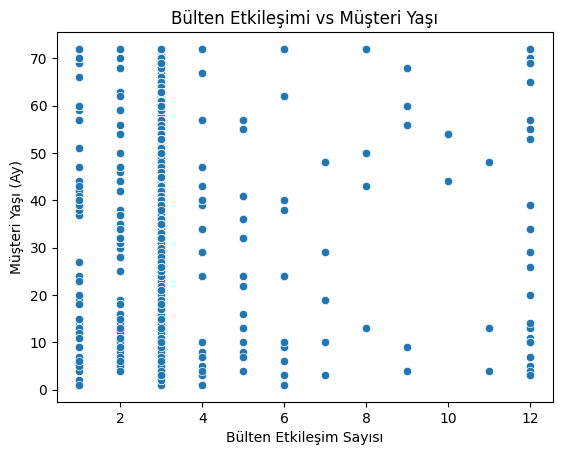

In [1340]:
sns.scatterplot(x = merged_df["Company Newsletter Interaction Count"], y = merged_df["Customer Age (Months)"])
plt.title("Bülten Etkileşimi vs Müşteri Yaşı")
plt.xlabel("Bülten Etkileşim Sayısı")
plt.ylabel("Müşteri Yaşı (Ay)")
plt.show()

**Genel Eğilim:**

* Grafikte, "Bülten Etkileşim Sayısı" ile "Müşteri Yaşı (Ay)" arasında belirgin bir doğrusal ilişki gözlemlenmemektedir.

* Veri noktaları, grafikte rastgele dağılmıştır. Bu, iki değişken arasında güçlü bir doğrusal ilişki olmadığını göstermektedir.

**Veri Noktalarının Dağılımı:**

* "Müşteri Yaşı (Ay)" değerleri, 0 ile 70 arasında dağılmıştır.

* "Bülten Etkileşim Sayısı" değerleri, 0 ile 12 arasında dağılmıştır.

* "Bülten Etkileşim Sayısı" 0 ile 4 arasında yoğunlaşmıştır.

* "Müşteri Yaşı (Ay)" değerleri grafikte daha homojen bir dağılım göstermektedir.

**Aykırı Değerler:**

* Grafikte, "Bülten Etkileşim Sayısı" yüksek (12 civarında) ve "Müşteri Yaşı (Ay)" yüksek (70 civarında) olan birkaç aykırı değer bulunmaktadır.

* Bu aykırı değerler, veri setinin genel eğilimini etkileyebilir ve analiz sonuçlarını çarpıtabilir.

* "Bülten Etkileşim Sayısı" 4'den yüksek olduğunda daha seyrek veri noktaları olduğu görülmektedir.

**Çıkarımlar:**

* "Bülten Etkileşim Sayısı" ile "Müşteri Yaşı (Ay)" arasında güçlü bir doğrusal ilişki bulunmamaktadır.

* Müşteri yaşı, bülten etkileşim sayısından bağımsız olarak değişebilir.

* Yüksek bülten etkileşim sayısına sahip müşterilerin yaşı yüksek olmayabilir.

**Öneriler:**

* Şirket, bülten etkileşimini etkileyen diğer faktörleri araştırmalıdır.

* Şirket, farklı yaş gruplarına yönelik bülten stratejileri geliştirebilir.

* Şirket, aykırı değerlerin nedenlerini araştırmalı ve bu değerlerin veri setini nasıl etkilediğini anlamalıdır